## Train and Analysis of Open Ended model

In [5]:
import os
# Make sure you use the autograd version of numpy (which we named 'ag_np')
# to do all the loss calculations, since automatic gradients are needed
import autograd.numpy as ag_np

# Use helper packages
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from train_valid_test_loader import load_train_valid_test_datasets

# Some packages you might need (uncomment as necessary)
import pandas as pd
import matplotlib.pyplot as plt

from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem

In [195]:
# Plotting utils
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [6]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()

test_y = test_tuple[2]


In [9]:
leaderboard_test_df = pd.read_csv(os.path.join('data_movie_lens_100k', "ratings_masked_leaderboard_set.csv"))
leaderboard_test_tuple = (leaderboard_test_df['user_id'].values,
                          leaderboard_test_df['item_id'].values)

In [21]:
output_dir = 'leaderboard_predictions'
if not os.path.isdir(output_dir):
    os.mkdir(output_dir)
    
def save_predictions(model, output_filetitle, mu, b_per_user, c_per_item, U, V):
    output_filename = output_filetitle + '_predicted_ratings_leaderboard.txt'
    output_path = os.path.join(output_dir, output_filename)
    yhat = model.predict(leaderboard_test_tuple[0], leaderboard_test_tuple[1], mu=mu, b_per_user=b_per_user, c_per_item=c_per_item, U=U, V=V)
    ag_np.savetxt(output_path, yhat)
    

## Analysis - with no regularization (α=0); K = 2

In [14]:
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
noreg_k2_model = CollabFilterOneVectorPerItem(
    n_epochs=500, batch_size=1000, step_size=0.1,
    n_factors=2, alpha=0.0)
noreg_k2_model.init_parameter_dict(n_users, n_items, train_tuple)

# Fit the model with SGD
noreg_k2_model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total     1.56002 | train_MAE     1.00255 | valid_MAE     1.00803 | grad_wrt_mu     0.95203 | grad_wrt_b_per_user     0.00167 | grad_wrt_c_per_item     0.00104 | grad_wrt_U     0.00057 | grad_wrt_V     0.00031
epoch       0.014 | loss_total     1.42677 | train_MAE     0.99187 | valid_MAE     0.99647 | grad_wrt_mu     0.90689 | grad_wrt_b_per_user     0.00164 | grad_wrt_c_per_item     0.00092 | grad_wrt_U     0.00058 | grad_wrt_V     0.00032
epoch       0.029 | loss_total     1.45318 | train_MAE     0.98171 | valid_MAE     0.98549 | grad_wrt_mu     0.86846 | grad_wrt_b_per_user     0.00162 | grad_wrt_c_per_item     0.00101 | grad_wrt_U     0.00052 | grad_wrt_V     0.00031
epoch       0.043 | loss_total     1.35081 | train_MAE     0.97196 | valid_MAE     0.97495 | grad_wrt_mu     0.50863 | grad_wrt_b_per_user     0.00148 | grad_wrt_c_per_item     0.00093 | grad_wrt_U     0.00031 | grad_wrt_V     0.00018
epoch       0.129 | loss_total     1.25943 | train_MAE     0

epoch      12.000 | loss_total     1.08873 | train_MAE     0.86261 | valid_MAE     0.86988 | grad_wrt_mu     0.10619 | grad_wrt_b_per_user     0.00122 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00007 | grad_wrt_V     0.00004
epoch      13.000 | loss_total     1.07963 | train_MAE     0.85628 | valid_MAE     0.86376 | grad_wrt_mu     0.00616 | grad_wrt_b_per_user     0.00128 | grad_wrt_c_per_item     0.00077 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch      14.000 | loss_total     1.07065 | train_MAE     0.85190 | valid_MAE     0.85973 | grad_wrt_mu     0.13253 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00078 | grad_wrt_U     0.00008 | grad_wrt_V     0.00005
epoch      15.000 | loss_total     1.06321 | train_MAE     0.84857 | valid_MAE     0.85680 | grad_wrt_mu     0.03412 | grad_wrt_b_per_user     0.00124 | grad_wrt_c_per_item     0.00075 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch      16.000 | loss_total     1.05492 | train_MAE     0

epoch      62.000 | loss_total     0.91941 | train_MAE     0.76652 | valid_MAE     0.78223 | grad_wrt_mu     0.03158 | grad_wrt_b_per_user     0.00113 | grad_wrt_c_per_item     0.00068 | grad_wrt_U     0.00002 | grad_wrt_V     0.00001
epoch      64.000 | loss_total     0.91756 | train_MAE     0.76665 | valid_MAE     0.78283 | grad_wrt_mu     0.04483 | grad_wrt_b_per_user     0.00112 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00003 | grad_wrt_V     0.00002
epoch      66.000 | loss_total     0.91655 | train_MAE     0.76275 | valid_MAE     0.77859 | grad_wrt_mu     0.12703 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00009 | grad_wrt_V     0.00006
epoch      68.000 | loss_total     0.91270 | train_MAE     0.76234 | valid_MAE     0.77856 | grad_wrt_mu     0.10264 | grad_wrt_b_per_user     0.00110 | grad_wrt_c_per_item     0.00065 | grad_wrt_U     0.00007 | grad_wrt_V     0.00005
epoch      70.000 | loss_total     0.91055 | train_MAE     0

epoch     136.000 | loss_total     0.87092 | train_MAE     0.74177 | valid_MAE     0.76304 | grad_wrt_mu     0.00278 | grad_wrt_b_per_user     0.00104 | grad_wrt_c_per_item     0.00067 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     140.000 | loss_total     0.86912 | train_MAE     0.74049 | valid_MAE     0.76179 | grad_wrt_mu     0.14520 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00013 | grad_wrt_V     0.00008
epoch     144.000 | loss_total     0.86825 | train_MAE     0.74055 | valid_MAE     0.76223 | grad_wrt_mu     0.13919 | grad_wrt_b_per_user     0.00101 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00012 | grad_wrt_V     0.00008
epoch     148.000 | loss_total     0.86873 | train_MAE     0.73888 | valid_MAE     0.76047 | grad_wrt_mu     0.09664 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00009 | grad_wrt_V     0.00006
epoch     152.000 | loss_total     0.86680 | train_MAE     0

epoch     276.000 | loss_total     0.84691 | train_MAE     0.72861 | valid_MAE     0.75430 | grad_wrt_mu     0.02750 | grad_wrt_b_per_user     0.00107 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00004 | grad_wrt_V     0.00002
epoch     280.000 | loss_total     0.84674 | train_MAE     0.72738 | valid_MAE     0.75298 | grad_wrt_mu     0.00051 | grad_wrt_b_per_user     0.00111 | grad_wrt_c_per_item     0.00066 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch     284.000 | loss_total     0.84555 | train_MAE     0.72786 | valid_MAE     0.75371 | grad_wrt_mu     0.00335 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00001 | grad_wrt_V     0.00000
epoch     288.000 | loss_total     0.84516 | train_MAE     0.72783 | valid_MAE     0.75378 | grad_wrt_mu     0.02695 | grad_wrt_b_per_user     0.00098 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00004 | grad_wrt_V     0.00002
epoch     292.000 | loss_total     0.84611 | train_MAE     0

epoch     416.000 | loss_total     0.83706 | train_MAE     0.72245 | valid_MAE     0.75036 | grad_wrt_mu     0.06908 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00063 | grad_wrt_U     0.00017 | grad_wrt_V     0.00011
epoch     420.000 | loss_total     0.83677 | train_MAE     0.72242 | valid_MAE     0.75041 | grad_wrt_mu     0.05032 | grad_wrt_b_per_user     0.00102 | grad_wrt_c_per_item     0.00061 | grad_wrt_U     0.00013 | grad_wrt_V     0.00008
epoch     424.000 | loss_total     0.83777 | train_MAE     0.72233 | valid_MAE     0.75028 | grad_wrt_mu     0.03391 | grad_wrt_b_per_user     0.00108 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00008 | grad_wrt_V     0.00006
epoch     428.000 | loss_total     0.83688 | train_MAE     0.72265 | valid_MAE     0.75087 | grad_wrt_mu     0.03650 | grad_wrt_b_per_user     0.00100 | grad_wrt_c_per_item     0.00062 | grad_wrt_U     0.00010 | grad_wrt_V     0.00006
epoch     432.000 | loss_total     0.83677 | train_MAE     0

In [15]:
print(f"Final Train MAE = {noreg_k2_model.trace_mae_train[-1]}")
print(f"Final Valid MAE = {noreg_k2_model.trace_mae_valid[-1]}")

noreg_k2_final_mu = noreg_k2_model.param_dict['mu']
noreg_k2_final_b_per_user = noreg_k2_model.param_dict['b_per_user']
noreg_k2_final_c_per_item = noreg_k2_model.param_dict['c_per_item']
noreg_k2_final_U = noreg_k2_model.param_dict['U']
noreg_k2_final_V = noreg_k2_model.param_dict['V']

noreg_k2_test_yhat = noreg_k2_model.predict(test_tuple[0], test_tuple[1], mu=noreg_k2_final_mu, b_per_user=noreg_k2_final_b_per_user, c_per_item=noreg_k2_final_c_per_item, U=noreg_k2_final_U, V=noreg_k2_final_V)
noreg_k2_test_mae = ag_np.mean(ag_np.absolute(test_y - noreg_k2_test_yhat))
print(f"Final Test MAE = {noreg_k2_test_mae}")

Final Train MAE = 0.7212616205895953
Final Valid MAE = 0.749751997378097
Final Test MAE = 0.7416190895402393


Text(0.5, 1.0, 'Vector Baseline Model Loss over Epochs, K = 2')

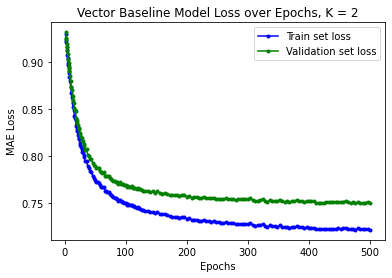

In [16]:
noreg_k2_epochs = ag_np.array(noreg_k2_model.trace_epoch)
noreg_k2_epochs_of_interest = ag_np.argwhere(noreg_k2_epochs >= 2.0)

noreg_k2_train_loss = ag_np.array(noreg_k2_model.trace_mae_train)[noreg_k2_epochs_of_interest]
noreg_k2_valid_loss = ag_np.array(noreg_k2_model.trace_mae_valid)[noreg_k2_epochs_of_interest]

plt.plot(noreg_k2_epochs[noreg_k2_epochs_of_interest], noreg_k2_train_loss, 'b.-', label='Train set loss')
plt.plot(noreg_k2_epochs[noreg_k2_epochs_of_interest], noreg_k2_valid_loss, 'g.-', label='Validation set loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('MAE Loss')
plt.title('Vector Baseline Model Loss over Epochs, K = 2')

In [22]:
save_predictions(noreg_k2_model, 
                 'noreg_k2_model', 
                 noreg_k2_final_mu, 
                 noreg_k2_final_b_per_user, 
                 noreg_k2_final_c_per_item, 
                 noreg_k2_final_U, 
                 noreg_k2_final_V)
#MAE on Leaderboard = 0.7401

## Using Surprise

In [34]:
from surprise import accuracy, BaselineOnly, Dataset, Reader, SVD
from surprise.model_selection import cross_validate, train_test_split

### Baseline model

In [35]:
# movie data loaded into a pandas dataframe
df = pd.read_csv(os.path.join('data_movie_lens_100k', "ratings_all_development_set.csv"))

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['user_id', 'item_id', 'rating']], reader)

# We can now use this dataset as we please, e.g. calling cross_validate
cross_validate(BaselineOnly(), data, verbose=True)

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9459  0.9433  0.9459  0.9475  0.9453  0.9456  0.0013  
MAE (testset)     0.7509  0.7462  0.7484  0.7546  0.7499  0.7500  0.0028  
Fit time          0.33    0.42    0.39    0.36    0.37    0.37    0.03    
Test time         0.20    0.11    0.11    0.18    0.11    0.14    0.04    


{'test_rmse': array([0.94593153, 0.94329908, 0.94586547, 0.94748469, 0.94533002]),
 'test_mae': array([0.75092657, 0.74621599, 0.74836685, 0.75461334, 0.74986745]),
 'fit_time': (0.32837605476379395,
  0.4180569648742676,
  0.3900129795074463,
  0.35918116569519043,
  0.3659648895263672),
 'test_time': (0.19675898551940918,
  0.10978984832763672,
  0.11285400390625,
  0.18480205535888672,
  0.10832476615905762)}

### Using SVD

In [80]:
from surprise.model_selection import KFold

# define a cross-validation iterator
kf = KFold(n_splits=5)

cv_algo = SVD()

for trainset, testset in kf.split(data):

    # train and test algorithm.
    cv_algo.fit(trainset)
    cv_predictions = cv_algo.test(testset)

    # Compute and print Mean Absolute Error
    accuracy.mae(cv_predictions, verbose=True)

MAE:  0.7411
MAE:  0.7388
MAE:  0.7430
MAE:  0.7481
MAE:  0.7429


In [81]:
predictions = cv_algo.test(testset)
accuracy.mae(predictions, verbose=True)

MAE:  0.7429


0.7429267071690356

In [85]:
outdir = 'leaderboard_predictions'
outfile = 'cv_svd_predicted_ratings_leaderboard.txt'
outpath = os.path.join(outdir, outfile)
with open(outpath, 'w') as f:
    for ind in range(len(leaderboard_test_tuple[0])):
        pred = cv_algo.predict(leaderboard_test_tuple[0][ind], leaderboard_test_tuple[1][ind])
        print(pred)
        f.write(str(pred[3])+'\n')

user: 503        item: 503        r_ui = None   est = 4.45   {'was_impossible': False}
user: 795        item: 795        r_ui = None   est = 3.18   {'was_impossible': False}
user: 42         item: 42         r_ui = None   est = 3.42   {'was_impossible': False}
user: 327        item: 327        r_ui = None   est = 3.26   {'was_impossible': False}
user: 285        item: 285        r_ui = None   est = 4.09   {'was_impossible': False}
user: 279        item: 279        r_ui = None   est = 3.41   {'was_impossible': False}
user: 496        item: 496        r_ui = None   est = 3.96   {'was_impossible': False}
user: 499        item: 499        r_ui = None   est = 3.47   {'was_impossible': False}
user: 357        item: 357        r_ui = None   est = 3.49   {'was_impossible': False}
user: 932        item: 932        r_ui = None   est = 1.86   {'was_impossible': False}
user: 821        item: 821        r_ui = None   est = 2.66   {'was_impossible': False}
user: 215        item: 215        r_ui = No

user: 781        item: 781        r_ui = None   est = 2.59   {'was_impossible': False}
user: 681        item: 681        r_ui = None   est = 2.30   {'was_impossible': False}
user: 42         item: 42         r_ui = None   est = 3.42   {'was_impossible': False}
user: 377        item: 377        r_ui = None   est = 2.97   {'was_impossible': False}
user: 693        item: 693        r_ui = None   est = 3.34   {'was_impossible': False}
user: 220        item: 220        r_ui = None   est = 3.96   {'was_impossible': False}
user: 565        item: 565        r_ui = None   est = 2.98   {'was_impossible': False}
user: 531        item: 531        r_ui = None   est = 4.17   {'was_impossible': False}
user: 56         item: 56         r_ui = None   est = 4.23   {'was_impossible': False}
user: 342        item: 342        r_ui = None   est = 3.80   {'was_impossible': False}
user: 362        item: 362        r_ui = None   est = 1.89   {'was_impossible': False}
user: 526        item: 526        r_ui = No

user: 250        item: 250        r_ui = None   est = 4.40   {'was_impossible': False}
user: 42         item: 42         r_ui = None   est = 3.42   {'was_impossible': False}
user: 144        item: 144        r_ui = None   est = 2.93   {'was_impossible': False}
user: 43         item: 43         r_ui = None   est = 3.05   {'was_impossible': False}
user: 372        item: 372        r_ui = None   est = 2.88   {'was_impossible': False}
user: 737        item: 737        r_ui = None   est = 3.20   {'was_impossible': False}
user: 464        item: 464        r_ui = None   est = 3.22   {'was_impossible': False}
user: 74         item: 74         r_ui = None   est = 3.57   {'was_impossible': False}
user: 931        item: 931        r_ui = None   est = 3.38   {'was_impossible': False}
user: 838        item: 838        r_ui = None   est = 2.67   {'was_impossible': False}
user: 372        item: 372        r_ui = None   est = 2.88   {'was_impossible': False}
user: 765        item: 765        r_ui = No

user: 520        item: 520        r_ui = None   est = 3.37   {'was_impossible': False}
user: 404        item: 404        r_ui = None   est = 1.22   {'was_impossible': False}
user: 475        item: 475        r_ui = None   est = 3.08   {'was_impossible': False}
user: 177        item: 177        r_ui = None   est = 4.40   {'was_impossible': False}
user: 534        item: 534        r_ui = None   est = 3.83   {'was_impossible': False}
user: 326        item: 326        r_ui = None   est = 2.44   {'was_impossible': False}
user: 325        item: 325        r_ui = None   est = 3.27   {'was_impossible': False}
user: 140        item: 140        r_ui = None   est = 3.49   {'was_impossible': False}
user: 874        item: 874        r_ui = None   est = 2.82   {'was_impossible': False}
user: 763        item: 763        r_ui = None   est = 3.12   {'was_impossible': False}
user: 654        item: 654        r_ui = None   est = 3.42   {'was_impossible': False}
user: 746        item: 746        r_ui = No

user: 62         item: 62         r_ui = None   est = 2.68   {'was_impossible': False}
user: 641        item: 641        r_ui = None   est = 3.97   {'was_impossible': False}
user: 415        item: 415        r_ui = None   est = 3.22   {'was_impossible': False}
user: 0          item: 0          r_ui = None   est = 3.88   {'was_impossible': False}
user: 157        item: 157        r_ui = None   est = 3.08   {'was_impossible': False}
user: 737        item: 737        r_ui = None   est = 3.20   {'was_impossible': False}
user: 115        item: 115        r_ui = None   est = 3.18   {'was_impossible': False}
user: 328        item: 328        r_ui = None   est = 2.76   {'was_impossible': False}
user: 413        item: 413        r_ui = None   est = 3.46   {'was_impossible': False}
user: 803        item: 803        r_ui = None   est = 3.56   {'was_impossible': False}
user: 327        item: 327        r_ui = None   est = 3.26   {'was_impossible': False}
user: 746        item: 746        r_ui = No

user: 212        item: 212        r_ui = None   est = 4.55   {'was_impossible': False}
user: 853        item: 853        r_ui = None   est = 3.54   {'was_impossible': False}
user: 584        item: 584        r_ui = None   est = 2.61   {'was_impossible': False}
user: 550        item: 550        r_ui = None   est = 3.27   {'was_impossible': False}
user: 144        item: 144        r_ui = None   est = 2.93   {'was_impossible': False}
user: 344        item: 344        r_ui = None   est = 4.01   {'was_impossible': False}
user: 559        item: 559        r_ui = None   est = 3.08   {'was_impossible': False}
user: 298        item: 298        r_ui = None   est = 3.87   {'was_impossible': False}
user: 456        item: 456        r_ui = None   est = 3.51   {'was_impossible': False}
user: 867        item: 867        r_ui = None   est = 2.45   {'was_impossible': False}
user: 449        item: 449        r_ui = None   est = 3.89   {'was_impossible': False}
user: 531        item: 531        r_ui = No

user: 540        item: 540        r_ui = None   est = 2.60   {'was_impossible': False}
user: 312        item: 312        r_ui = None   est = 2.75   {'was_impossible': False}
user: 536        item: 536        r_ui = None   est = 2.99   {'was_impossible': False}
user: 882        item: 882        r_ui = None   est = 3.59   {'was_impossible': False}
user: 37         item: 37         r_ui = None   est = 3.37   {'was_impossible': False}
user: 757        item: 757        r_ui = None   est = 2.81   {'was_impossible': False}
user: 36         item: 36         r_ui = None   est = 3.31   {'was_impossible': False}
user: 120        item: 120        r_ui = None   est = 2.38   {'was_impossible': False}
user: 804        item: 804        r_ui = None   est = 3.99   {'was_impossible': False}
user: 900        item: 900        r_ui = None   est = 4.08   {'was_impossible': False}
user: 394        item: 394        r_ui = None   est = 2.95   {'was_impossible': False}
user: 882        item: 882        r_ui = No

user: 333        item: 333        r_ui = None   est = 2.95   {'was_impossible': False}
user: 199        item: 199        r_ui = None   est = 4.06   {'was_impossible': False}
user: 263        item: 263        r_ui = None   est = 3.14   {'was_impossible': False}
user: 341        item: 341        r_ui = None   est = 2.76   {'was_impossible': False}
user: 600        item: 600        r_ui = None   est = 2.99   {'was_impossible': False}
user: 157        item: 157        r_ui = None   est = 3.08   {'was_impossible': False}
user: 710        item: 710        r_ui = None   est = 3.68   {'was_impossible': False}
user: 556        item: 556        r_ui = None   est = 3.79   {'was_impossible': False}
user: 750        item: 750        r_ui = None   est = 2.97   {'was_impossible': False}
user: 822        item: 822        r_ui = None   est = 3.20   {'was_impossible': False}
user: 847        item: 847        r_ui = None   est = 3.13   {'was_impossible': False}
user: 427        item: 427        r_ui = No

user: 436        item: 436        r_ui = None   est = 2.84   {'was_impossible': False}
user: 938        item: 938        r_ui = None   est = 3.50   {'was_impossible': False}
user: 278        item: 278        r_ui = None   est = 3.17   {'was_impossible': False}
user: 914        item: 914        r_ui = None   est = 2.51   {'was_impossible': False}
user: 311        item: 311        r_ui = None   est = 4.71   {'was_impossible': False}
user: 499        item: 499        r_ui = None   est = 3.47   {'was_impossible': False}
user: 536        item: 536        r_ui = None   est = 2.99   {'was_impossible': False}
user: 12         item: 12         r_ui = None   est = 3.79   {'was_impossible': False}
user: 269        item: 269        r_ui = None   est = 4.30   {'was_impossible': False}
user: 101        item: 101        r_ui = None   est = 2.41   {'was_impossible': False}
user: 471        item: 471        r_ui = None   est = 4.19   {'was_impossible': False}
user: 730        item: 730        r_ui = No

In [86]:
trainset, testset = train_test_split(data, test_size=.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.mae(predictions)

MAE:  0.7508


0.7507650600189788

In [88]:
outdir = 'leaderboard_predictions'
outfile = 'svd_predicted_ratings_leaderboard.txt'
outpath = os.path.join(outdir, outfile)
with open(outpath, 'w') as f:
    for ind in range(len(leaderboard_test_tuple[0])):
        pred = algo.predict(leaderboard_test_tuple[0][ind], leaderboard_test_tuple[1][ind])
        print(pred)
        f.write(str(pred[3])+'\n')

user: 503        item: 503        r_ui = None   est = 4.00   {'was_impossible': False}
user: 795        item: 795        r_ui = None   est = 3.60   {'was_impossible': False}
user: 42         item: 42         r_ui = None   est = 3.37   {'was_impossible': False}
user: 327        item: 327        r_ui = None   est = 3.23   {'was_impossible': False}
user: 285        item: 285        r_ui = None   est = 3.69   {'was_impossible': False}
user: 279        item: 279        r_ui = None   est = 3.62   {'was_impossible': False}
user: 496        item: 496        r_ui = None   est = 3.73   {'was_impossible': False}
user: 499        item: 499        r_ui = None   est = 3.32   {'was_impossible': False}
user: 357        item: 357        r_ui = None   est = 3.43   {'was_impossible': False}
user: 932        item: 932        r_ui = None   est = 1.87   {'was_impossible': False}
user: 821        item: 821        r_ui = None   est = 2.64   {'was_impossible': False}
user: 215        item: 215        r_ui = No

user: 765        item: 765        r_ui = None   est = 2.76   {'was_impossible': False}
user: 861        item: 861        r_ui = None   est = 4.33   {'was_impossible': False}
user: 714        item: 714        r_ui = None   est = 2.81   {'was_impossible': False}
user: 268        item: 268        r_ui = None   est = 1.99   {'was_impossible': False}
user: 849        item: 849        r_ui = None   est = 3.97   {'was_impossible': False}
user: 20         item: 20         r_ui = None   est = 2.63   {'was_impossible': False}
user: 53         item: 53         r_ui = None   est = 3.89   {'was_impossible': False}
user: 665        item: 665        r_ui = None   est = 3.07   {'was_impossible': False}
user: 859        item: 859        r_ui = None   est = 3.24   {'was_impossible': False}
user: 667        item: 667        r_ui = None   est = 2.37   {'was_impossible': False}
user: 366        item: 366        r_ui = None   est = 2.75   {'was_impossible': False}
user: 345        item: 345        r_ui = No

user: 898        item: 898        r_ui = None   est = 3.67   {'was_impossible': False}
user: 689        item: 689        r_ui = None   est = 3.21   {'was_impossible': False}
user: 740        item: 740        r_ui = None   est = 3.14   {'was_impossible': False}
user: 931        item: 931        r_ui = None   est = 3.19   {'was_impossible': False}
user: 532        item: 532        r_ui = None   est = 3.13   {'was_impossible': False}
user: 865        item: 865        r_ui = None   est = 3.08   {'was_impossible': False}
user: 670        item: 670        r_ui = None   est = 3.06   {'was_impossible': False}
user: 140        item: 140        r_ui = None   est = 3.22   {'was_impossible': False}
user: 372        item: 372        r_ui = None   est = 2.82   {'was_impossible': False}
user: 830        item: 830        r_ui = None   est = 2.40   {'was_impossible': False}
user: 495        item: 495        r_ui = None   est = 2.90   {'was_impossible': False}
user: 415        item: 415        r_ui = No

user: 221        item: 221        r_ui = None   est = 4.14   {'was_impossible': False}
user: 441        item: 441        r_ui = None   est = 3.63   {'was_impossible': False}
user: 17         item: 17         r_ui = None   est = 3.25   {'was_impossible': False}
user: 379        item: 379        r_ui = None   est = 2.94   {'was_impossible': False}
user: 587        item: 587        r_ui = None   est = 4.40   {'was_impossible': False}
user: 446        item: 446        r_ui = None   est = 3.39   {'was_impossible': False}
user: 662        item: 662        r_ui = None   est = 3.61   {'was_impossible': False}
user: 450        item: 450        r_ui = None   est = 2.44   {'was_impossible': False}
user: 655        item: 655        r_ui = None   est = 3.89   {'was_impossible': False}
user: 396        item: 396        r_ui = None   est = 2.47   {'was_impossible': False}
user: 143        item: 143        r_ui = None   est = 3.99   {'was_impossible': False}
user: 853        item: 853        r_ui = No

user: 245        item: 245        r_ui = None   est = 3.81   {'was_impossible': False}
user: 806        item: 806        r_ui = None   est = 3.49   {'was_impossible': False}
user: 895        item: 895        r_ui = None   est = 2.58   {'was_impossible': False}
user: 540        item: 540        r_ui = None   est = 2.04   {'was_impossible': False}
user: 51         item: 51         r_ui = None   est = 4.49   {'was_impossible': False}
user: 652        item: 652        r_ui = None   est = 3.01   {'was_impossible': False}
user: 200        item: 200        r_ui = None   est = 3.16   {'was_impossible': False}
user: 6          item: 6          r_ui = None   est = 4.74   {'was_impossible': False}
user: 268        item: 268        r_ui = None   est = 1.99   {'was_impossible': False}
user: 415        item: 415        r_ui = None   est = 3.50   {'was_impossible': False}
user: 501        item: 501        r_ui = None   est = 3.51   {'was_impossible': False}
user: 200        item: 200        r_ui = No

user: 200        item: 200        r_ui = None   est = 3.16   {'was_impossible': False}
user: 935        item: 935        r_ui = None   est = 3.79   {'was_impossible': False}
user: 292        item: 292        r_ui = None   est = 2.11   {'was_impossible': False}
user: 521        item: 521        r_ui = None   est = 4.64   {'was_impossible': False}
user: 105        item: 105        r_ui = None   est = 3.11   {'was_impossible': False}
user: 504        item: 504        r_ui = None   est = 3.49   {'was_impossible': False}
user: 689        item: 689        r_ui = None   est = 3.21   {'was_impossible': False}
user: 270        item: 270        r_ui = None   est = 3.71   {'was_impossible': False}
user: 353        item: 353        r_ui = None   est = 3.14   {'was_impossible': False}
user: 720        item: 720        r_ui = None   est = 3.30   {'was_impossible': False}
user: 411        item: 411        r_ui = None   est = 2.74   {'was_impossible': False}
user: 27         item: 27         r_ui = No

user: 90         item: 90         r_ui = None   est = 3.76   {'was_impossible': False}
user: 468        item: 468        r_ui = None   est = 4.08   {'was_impossible': False}
user: 270        item: 270        r_ui = None   est = 3.71   {'was_impossible': False}
user: 507        item: 507        r_ui = None   est = 4.02   {'was_impossible': False}
user: 215        item: 215        r_ui = None   est = 4.24   {'was_impossible': False}
user: 616        item: 616        r_ui = None   est = 2.09   {'was_impossible': False}
user: 907        item: 907        r_ui = None   est = 3.33   {'was_impossible': False}
user: 829        item: 829        r_ui = None   est = 2.48   {'was_impossible': False}
user: 504        item: 504        r_ui = None   est = 3.49   {'was_impossible': False}
user: 676        item: 676        r_ui = None   est = 3.83   {'was_impossible': False}
user: 653        item: 653        r_ui = None   est = 4.03   {'was_impossible': False}
user: 125        item: 125        r_ui = No

user: 279        item: 279        r_ui = None   est = 3.62   {'was_impossible': False}
user: 761        item: 761        r_ui = None   est = 2.85   {'was_impossible': False}
user: 200        item: 200        r_ui = None   est = 3.16   {'was_impossible': False}
user: 869        item: 869        r_ui = None   est = 2.70   {'was_impossible': False}
user: 343        item: 343        r_ui = None   est = 3.35   {'was_impossible': False}
user: 827        item: 827        r_ui = None   est = 2.59   {'was_impossible': False}
user: 876        item: 876        r_ui = None   est = 2.66   {'was_impossible': False}
user: 483        item: 483        r_ui = None   est = 4.55   {'was_impossible': False}
user: 416        item: 416        r_ui = None   est = 3.53   {'was_impossible': False}
user: 473        item: 473        r_ui = None   est = 4.46   {'was_impossible': False}
user: 532        item: 532        r_ui = None   est = 3.13   {'was_impossible': False}
user: 732        item: 732        r_ui = No

### Using KNN

In [89]:
from surprise import KNNBasic
knn_algo = KNNBasic()

# Train the algorithm on the trainset, and predict ratings for the testset
knn_algo.fit(trainset)
knn_predictions = knn_algo.test(testset)

# Then compute MAE
accuracy.mae(knn_predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7815


0.7814978476820299

In [90]:
from surprise import KNNWithMeans
knn_means_algo = KNNWithMeans()

# Train the algorithm on the trainset, and predict ratings for the testset
knn_means_algo.fit(trainset)
knn_means_predictions = knn_means_algo.test(testset)

# Then compute MAE
accuracy.mae(knn_means_predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7537


0.7537069900117388

In [91]:
outdir = 'leaderboard_predictions'
outfile = 'knn_means_predicted_ratings_leaderboard.txt'
outpath = os.path.join(outdir, outfile)
with open(outpath, 'w') as f:
    for ind in range(len(leaderboard_test_tuple[0])):
        pred = knn_means_algo.predict(leaderboard_test_tuple[0][ind], leaderboard_test_tuple[1][ind])
        print(pred)
        f.write(str(pred[3])+'\n')

user: 503        item: 503        r_ui = None   est = 3.89   {'actual_k': 40, 'was_impossible': False}
user: 795        item: 795        r_ui = None   est = 3.31   {'actual_k': 23, 'was_impossible': False}
user: 42         item: 42         r_ui = None   est = 3.27   {'actual_k': 29, 'was_impossible': False}
user: 327        item: 327        r_ui = None   est = 3.25   {'actual_k': 26, 'was_impossible': False}
user: 285        item: 285        r_ui = None   est = 3.69   {'actual_k': 40, 'was_impossible': False}
user: 279        item: 279        r_ui = None   est = 3.24   {'actual_k': 40, 'was_impossible': False}
user: 496        item: 496        r_ui = None   est = 3.61   {'actual_k': 40, 'was_impossible': False}
user: 499        item: 499        r_ui = None   est = 3.20   {'actual_k': 40, 'was_impossible': False}
user: 357        item: 357        r_ui = None   est = 3.53   {'actual_k': 7, 'was_impossible': False}
user: 932        item: 932        r_ui = None   est = 2.09   {'actual_k': 

user: 129        item: 129        r_ui = None   est = 2.96   {'actual_k': 16, 'was_impossible': False}
user: 665        item: 665        r_ui = None   est = 2.74   {'actual_k': 9, 'was_impossible': False}
user: 706        item: 706        r_ui = None   est = 3.38   {'actual_k': 40, 'was_impossible': False}
user: 220        item: 220        r_ui = None   est = 3.67   {'actual_k': 40, 'was_impossible': False}
user: 500        item: 500        r_ui = None   est = 3.75   {'actual_k': 31, 'was_impossible': False}
user: 496        item: 496        r_ui = None   est = 3.61   {'actual_k': 40, 'was_impossible': False}
user: 547        item: 547        r_ui = None   est = 3.93   {'actual_k': 40, 'was_impossible': False}
user: 242        item: 242        r_ui = None   est = 2.44   {'actual_k': 40, 'was_impossible': False}
user: 300        item: 300        r_ui = None   est = 4.16   {'actual_k': 40, 'was_impossible': False}
user: 523        item: 523        r_ui = None   est = 3.92   {'actual_k': 

user: 499        item: 499        r_ui = None   est = 3.20   {'actual_k': 40, 'was_impossible': False}
user: 2          item: 2          r_ui = None   est = 2.64   {'actual_k': 40, 'was_impossible': False}
user: 22         item: 22         r_ui = None   est = 4.08   {'actual_k': 40, 'was_impossible': False}
user: 129        item: 129        r_ui = None   est = 2.96   {'actual_k': 16, 'was_impossible': False}
user: 642        item: 642        r_ui = None   est = 3.90   {'actual_k': 23, 'was_impossible': False}
user: 93         item: 93         r_ui = None   est = 3.12   {'actual_k': 40, 'was_impossible': False}
user: 765        item: 765        r_ui = None   est = 2.36   {'actual_k': 9, 'was_impossible': False}
user: 861        item: 861        r_ui = None   est = 4.34   {'actual_k': 17, 'was_impossible': False}
user: 714        item: 714        r_ui = None   est = 2.96   {'actual_k': 34, 'was_impossible': False}
user: 268        item: 268        r_ui = None   est = 2.80   {'actual_k': 

user: 497        item: 497        r_ui = None   est = 3.44   {'actual_k': 40, 'was_impossible': False}
user: 498        item: 498        r_ui = None   est = 4.11   {'actual_k': 22, 'was_impossible': False}
user: 12         item: 12         r_ui = None   est = 2.84   {'actual_k': 40, 'was_impossible': False}
user: 422        item: 422        r_ui = None   est = 1.64   {'actual_k': 13, 'was_impossible': False}
user: 101        item: 101        r_ui = None   est = 2.21   {'actual_k': 40, 'was_impossible': False}
user: 243        item: 243        r_ui = None   est = 3.15   {'actual_k': 30, 'was_impossible': False}
user: 404        item: 404        r_ui = None   est = 1.00   {'actual_k': 39, 'was_impossible': False}
user: 157        item: 157        r_ui = None   est = 2.87   {'actual_k': 38, 'was_impossible': False}
user: 889        item: 889        r_ui = None   est = 3.90   {'actual_k': 3, 'was_impossible': False}
user: 867        item: 867        r_ui = None   est = 2.49   {'actual_k': 

user: 198        item: 198        r_ui = None   est = 3.50   {'actual_k': 40, 'was_impossible': False}
user: 147        item: 147        r_ui = None   est = 3.74   {'actual_k': 40, 'was_impossible': False}
user: 681        item: 681        r_ui = None   est = 2.25   {'actual_k': 35, 'was_impossible': False}
user: 270        item: 270        r_ui = None   est = 3.97   {'actual_k': 40, 'was_impossible': False}
user: 267        item: 267        r_ui = None   est = 3.50   {'actual_k': 40, 'was_impossible': False}
user: 494        item: 494        r_ui = None   est = 4.40   {'actual_k': 40, 'was_impossible': False}
user: 492        item: 492        r_ui = None   est = 3.87   {'actual_k': 39, 'was_impossible': False}
user: 124        item: 124        r_ui = None   est = 3.40   {'actual_k': 40, 'was_impossible': False}
user: 806        item: 806        r_ui = None   est = 3.62   {'actual_k': 23, 'was_impossible': False}
user: 61         item: 61         r_ui = None   est = 2.80   {'actual_k':

user: 10         item: 10         r_ui = None   est = 3.13   {'actual_k': 40, 'was_impossible': False}
user: 541        item: 541        r_ui = None   est = 3.55   {'actual_k': 14, 'was_impossible': False}
user: 398        item: 398        r_ui = None   est = 2.31   {'actual_k': 10, 'was_impossible': False}
user: 932        item: 932        r_ui = None   est = 2.09   {'actual_k': 40, 'was_impossible': False}
user: 613        item: 613        r_ui = None   est = 3.28   {'actual_k': 32, 'was_impossible': False}
user: 879        item: 879        r_ui = None   est = 3.02   {'actual_k': 34, 'was_impossible': False}
user: 536        item: 536        r_ui = None   est = 2.86   {'actual_k': 40, 'was_impossible': False}
user: 566        item: 566        r_ui = None   est = 3.91   {'actual_k': 40, 'was_impossible': False}
user: 193        item: 193        r_ui = None   est = 3.47   {'actual_k': 40, 'was_impossible': False}
user: 503        item: 503        r_ui = None   est = 3.89   {'actual_k':

user: 885        item: 885        r_ui = None   est = 3.72   {'actual_k': 28, 'was_impossible': False}
user: 740        item: 740        r_ui = None   est = 3.55   {'actual_k': 40, 'was_impossible': False}
user: 879        item: 879        r_ui = None   est = 3.02   {'actual_k': 34, 'was_impossible': False}
user: 338        item: 338        r_ui = None   est = 4.37   {'actual_k': 40, 'was_impossible': False}
user: 565        item: 565        r_ui = None   est = 2.82   {'actual_k': 24, 'was_impossible': False}
user: 556        item: 556        r_ui = None   est = 3.94   {'actual_k': 40, 'was_impossible': False}
user: 715        item: 715        r_ui = None   est = 3.16   {'actual_k': 40, 'was_impossible': False}
user: 83         item: 83         r_ui = None   est = 3.13   {'actual_k': 12, 'was_impossible': False}
user: 387        item: 387        r_ui = None   est = 4.35   {'actual_k': 19, 'was_impossible': False}
user: 658        item: 658        r_ui = None   est = 3.66   {'actual_k':

user: 11         item: 11         r_ui = None   est = 5.00   {'actual_k': 40, 'was_impossible': False}
user: 212        item: 212        r_ui = None   est = 4.47   {'actual_k': 40, 'was_impossible': False}
user: 437        item: 437        r_ui = None   est = 2.30   {'actual_k': 3, 'was_impossible': False}
user: 544        item: 544        r_ui = None   est = 3.08   {'actual_k': 40, 'was_impossible': False}
user: 278        item: 278        r_ui = None   est = 2.79   {'actual_k': 40, 'was_impossible': False}
user: 902        item: 902        r_ui = None   est = 3.87   {'actual_k': 12, 'was_impossible': False}
user: 500        item: 500        r_ui = None   est = 3.75   {'actual_k': 31, 'was_impossible': False}
user: 893        item: 893        r_ui = None   est = 3.04   {'actual_k': 40, 'was_impossible': False}
user: 475        item: 475        r_ui = None   est = 3.23   {'actual_k': 40, 'was_impossible': False}
user: 397        item: 397        r_ui = None   est = 3.46   {'actual_k': 

user: 513        item: 513        r_ui = None   est = 4.42   {'actual_k': 40, 'was_impossible': False}
user: 746        item: 746        r_ui = None   est = 3.15   {'actual_k': 40, 'was_impossible': False}
user: 270        item: 270        r_ui = None   est = 3.97   {'actual_k': 40, 'was_impossible': False}
user: 360        item: 360        r_ui = None   est = 3.11   {'actual_k': 22, 'was_impossible': False}
user: 714        item: 714        r_ui = None   est = 2.96   {'actual_k': 34, 'was_impossible': False}
user: 287        item: 287        r_ui = None   est = 3.19   {'actual_k': 40, 'was_impossible': False}
user: 536        item: 536        r_ui = None   est = 2.86   {'actual_k': 40, 'was_impossible': False}
user: 293        item: 293        r_ui = None   est = 3.56   {'actual_k': 40, 'was_impossible': False}
user: 706        item: 706        r_ui = None   est = 3.38   {'actual_k': 40, 'was_impossible': False}
user: 304        item: 304        r_ui = None   est = 3.78   {'actual_k':

user: 867        item: 867        r_ui = None   est = 2.49   {'actual_k': 14, 'was_impossible': False}
user: 285        item: 285        r_ui = None   est = 3.69   {'actual_k': 40, 'was_impossible': False}
user: 729        item: 729        r_ui = None   est = 2.96   {'actual_k': 24, 'was_impossible': False}
user: 755        item: 755        r_ui = None   est = 3.18   {'actual_k': 2, 'was_impossible': False}
user: 392        item: 392        r_ui = None   est = 3.19   {'actual_k': 8, 'was_impossible': False}
user: 706        item: 706        r_ui = None   est = 3.38   {'actual_k': 40, 'was_impossible': False}
user: 542        item: 542        r_ui = None   est = 3.42   {'actual_k': 40, 'was_impossible': False}
user: 404        item: 404        r_ui = None   est = 1.00   {'actual_k': 39, 'was_impossible': False}
user: 335        item: 335        r_ui = None   est = 2.38   {'actual_k': 9, 'was_impossible': False}
user: 125        item: 125        r_ui = None   est = 3.64   {'actual_k': 40

user: 388        item: 388        r_ui = None   est = 4.16   {'actual_k': 6, 'was_impossible': False}
user: 884        item: 884        r_ui = None   est = 3.22   {'actual_k': 33, 'was_impossible': False}
user: 698        item: 698        r_ui = None   est = 2.56   {'actual_k': 11, 'was_impossible': False}
user: 4          item: 4          r_ui = None   est = 2.67   {'actual_k': 40, 'was_impossible': False}
user: 252        item: 252        r_ui = None   est = 4.23   {'actual_k': 23, 'was_impossible': False}
user: 647        item: 647        r_ui = None   est = 3.14   {'actual_k': 29, 'was_impossible': False}
user: 392        item: 392        r_ui = None   est = 3.19   {'actual_k': 8, 'was_impossible': False}
user: 346        item: 346        r_ui = None   est = 3.46   {'actual_k': 20, 'was_impossible': False}
user: 175        item: 175        r_ui = None   est = 4.12   {'actual_k': 40, 'was_impossible': False}
user: 663        item: 663        r_ui = None   est = 3.11   {'actual_k': 4

user: 206        item: 206        r_ui = None   est = 3.41   {'actual_k': 40, 'was_impossible': False}
user: 84         item: 84         r_ui = None   est = 3.13   {'actual_k': 40, 'was_impossible': False}
user: 275        item: 275        r_ui = None   est = 3.32   {'actual_k': 40, 'was_impossible': False}
user: 561        item: 561        r_ui = None   est = 2.42   {'actual_k': 17, 'was_impossible': False}
user: 177        item: 177        r_ui = None   est = 4.14   {'actual_k': 40, 'was_impossible': False}
user: 256        item: 256        r_ui = None   est = 4.03   {'actual_k': 40, 'was_impossible': False}
user: 150        item: 150        r_ui = None   est = 4.43   {'actual_k': 40, 'was_impossible': False}
user: 372        item: 372        r_ui = None   est = 2.54   {'actual_k': 8, 'was_impossible': False}
user: 143        item: 143        r_ui = None   est = 4.13   {'actual_k': 40, 'was_impossible': False}
user: 652        item: 652        r_ui = None   est = 3.03   {'actual_k': 

user: 282        item: 282        r_ui = None   est = 4.02   {'actual_k': 40, 'was_impossible': False}
user: 937        item: 937        r_ui = None   est = 3.52   {'actual_k': 39, 'was_impossible': False}
user: 355        item: 355        r_ui = None   est = 4.09   {'actual_k': 40, 'was_impossible': False}
user: 731        item: 731        r_ui = None   est = 3.53   {'actual_k': 10, 'was_impossible': False}
user: 814        item: 814        r_ui = None   est = 2.68   {'actual_k': 15, 'was_impossible': False}
user: 845        item: 845        r_ui = None   est = 3.79   {'actual_k': 29, 'was_impossible': False}
user: 647        item: 647        r_ui = None   est = 3.14   {'actual_k': 29, 'was_impossible': False}
user: 751        item: 751        r_ui = None   est = 3.45   {'actual_k': 16, 'was_impossible': False}
user: 362        item: 362        r_ui = None   est = 2.33   {'actual_k': 24, 'was_impossible': False}
user: 566        item: 566        r_ui = None   est = 3.91   {'actual_k':

user: 180        item: 180        r_ui = None   est = 1.93   {'actual_k': 40, 'was_impossible': False}
user: 415        item: 415        r_ui = None   est = 3.46   {'actual_k': 40, 'was_impossible': False}
user: 523        item: 523        r_ui = None   est = 3.92   {'actual_k': 40, 'was_impossible': False}
user: 278        item: 278        r_ui = None   est = 2.79   {'actual_k': 40, 'was_impossible': False}
user: 485        item: 485        r_ui = None   est = 3.64   {'actual_k': 40, 'was_impossible': False}
user: 118        item: 118        r_ui = None   est = 4.86   {'actual_k': 3, 'was_impossible': False}
user: 379        item: 379        r_ui = None   est = 3.05   {'actual_k': 40, 'was_impossible': False}
user: 111        item: 111        r_ui = None   est = 2.89   {'actual_k': 14, 'was_impossible': False}
user: 273        item: 273        r_ui = None   est = 4.41   {'actual_k': 40, 'was_impossible': False}
user: 377        item: 377        r_ui = None   est = 3.08   {'actual_k': 

In [93]:
from surprise import KNNBaseline
knn_baseline_algo = KNNBaseline()

# Train the algorithm on the trainset, and predict ratings for the testset
knn_baseline_algo.fit(trainset)
knn_baseline_predictions = knn_baseline_algo.test(testset)

# Then compute MAE
accuracy.mae(knn_baseline_predictions)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7388


0.7387677967511745

In [135]:
knn_baseline_algo.k

40

In [121]:
outdir = 'leaderboard_predictions'
outfile = 'knn_baseline_predicted_ratings_leaderboard.txt'
outpath = os.path.join(outdir, outfile)
with open(outpath, 'w') as f:
    for ind in range(len(leaderboard_test_tuple[0])):
        pred = knn_baseline_algo.predict(leaderboard_test_tuple[0][ind], leaderboard_test_tuple[1][ind])
        print(pred)
        f.write(str(pred[3])+'\n')

user: 503        item: 204        r_ui = None   est = 4.14   {'actual_k': 40, 'was_impossible': False}
user: 795        item: 185        r_ui = None   est = 3.80   {'actual_k': 40, 'was_impossible': False}
user: 42         item: 403        r_ui = None   est = 3.52   {'actual_k': 40, 'was_impossible': False}
user: 327        item: 740        r_ui = None   est = 3.34   {'actual_k': 40, 'was_impossible': False}
user: 285        item: 98         r_ui = None   est = 4.00   {'actual_k': 40, 'was_impossible': False}
user: 279        item: 11         r_ui = None   est = 4.65   {'actual_k': 40, 'was_impossible': False}
user: 496        item: 588        r_ui = None   est = 2.11   {'actual_k': 13, 'was_impossible': False}
user: 499        item: 266        r_ui = None   est = 3.52   {'actual_k': 40, 'was_impossible': False}
user: 357        item: 126        r_ui = None   est = 3.93   {'actual_k': 40, 'was_impossible': False}
user: 932        item: 182        r_ui = None   est = 3.37   {'actual_k':

user: 37         item: 138        r_ui = None   est = 3.25   {'actual_k': 36, 'was_impossible': False}
user: 560        item: 629        r_ui = None   est = 3.25   {'actual_k': 40, 'was_impossible': False}
user: 221        item: 732        r_ui = None   est = 2.46   {'actual_k': 17, 'was_impossible': False}
user: 338        item: 477        r_ui = None   est = 4.70   {'actual_k': 40, 'was_impossible': False}
user: 853        item: 920        r_ui = None   est = 3.51   {'actual_k': 26, 'was_impossible': False}
user: 659        item: 124        r_ui = None   est = 2.54   {'actual_k': 40, 'was_impossible': False}
user: 706        item: 524        r_ui = None   est = 3.64   {'actual_k': 40, 'was_impossible': False}
user: 748        item: 278        r_ui = None   est = 3.21   {'actual_k': 40, 'was_impossible': False}
user: 706        item: 110        r_ui = None   est = 3.34   {'actual_k': 40, 'was_impossible': False}
user: 220        item: 155        r_ui = None   est = 4.15   {'actual_k':

user: 718        item: 740        r_ui = None   est = 3.20   {'actual_k': 40, 'was_impossible': False}
user: 267        item: 580        r_ui = None   est = 3.22   {'actual_k': 40, 'was_impossible': False}
user: 471        item: 1072       r_ui = None   est = 3.64   {'actual_k': 40, 'was_impossible': False}
user: 127        item: 727        r_ui = None   est = 3.48   {'actual_k': 40, 'was_impossible': False}
user: 832        item: 29         r_ui = None   est = 3.49   {'actual_k': 24, 'was_impossible': False}
user: 406        item: 153        r_ui = None   est = 3.65   {'actual_k': 40, 'was_impossible': False}
user: 416        item: 1181       r_ui = None   est = 2.23   {'actual_k': 11, 'was_impossible': False}
user: 710        item: 131        r_ui = None   est = 4.43   {'actual_k': 40, 'was_impossible': False}
user: 269        item: 52         r_ui = None   est = 3.64   {'actual_k': 40, 'was_impossible': False}
user: 290        item: 201        r_ui = None   est = 3.96   {'actual_k':

user: 483        item: 232        r_ui = None   est = 3.90   {'actual_k': 40, 'was_impossible': False}
user: 412        item: 299        r_ui = None   est = 3.43   {'actual_k': 40, 'was_impossible': False}
user: 12         item: 216        r_ui = None   est = 2.85   {'actual_k': 40, 'was_impossible': False}
user: 703        item: 430        r_ui = None   est = 3.68   {'actual_k': 40, 'was_impossible': False}
user: 449        item: 715        r_ui = None   est = 3.17   {'actual_k': 40, 'was_impossible': False}
user: 212        item: 6          r_ui = None   est = 4.09   {'actual_k': 40, 'was_impossible': False}
user: 88         item: 110        r_ui = None   est = 4.04   {'actual_k': 40, 'was_impossible': False}
user: 680        item: 680        r_ui = None   est = 2.47   {'actual_k': 40, 'was_impossible': False}
user: 710        item: 483        r_ui = None   est = 4.00   {'actual_k': 40, 'was_impossible': False}
user: 305        item: 24         r_ui = None   est = 3.75   {'actual_k':

user: 628        item: 267        r_ui = None   est = 4.17   {'actual_k': 40, 'was_impossible': False}
user: 746        item: 459        r_ui = None   est = 3.96   {'actual_k': 40, 'was_impossible': False}
user: 94         item: 67         r_ui = None   est = 3.58   {'actual_k': 40, 'was_impossible': False}
user: 531        item: 311        r_ui = None   est = 4.93   {'actual_k': 40, 'was_impossible': False}
user: 664        item: 155        r_ui = None   est = 3.91   {'actual_k': 40, 'was_impossible': False}
user: 333        item: 178        r_ui = None   est = 3.96   {'actual_k': 40, 'was_impossible': False}
user: 942        item: 403        r_ui = None   est = 3.38   {'actual_k': 40, 'was_impossible': False}
user: 362        item: 569        r_ui = None   est = 2.13   {'actual_k': 18, 'was_impossible': False}
user: 283        item: 752        r_ui = None   est = 3.39   {'actual_k': 40, 'was_impossible': False}
user: 537        item: 954        r_ui = None   est = 3.61   {'actual_k':

user: 631        item: 172        r_ui = None   est = 3.89   {'actual_k': 40, 'was_impossible': False}
user: 320        item: 460        r_ui = None   est = 3.66   {'actual_k': 40, 'was_impossible': False}
user: 550        item: 236        r_ui = None   est = 4.08   {'actual_k': 40, 'was_impossible': False}
user: 221        item: 99         r_ui = None   est = 3.76   {'actual_k': 40, 'was_impossible': False}
user: 898        item: 237        r_ui = None   est = 3.67   {'actual_k': 40, 'was_impossible': False}
user: 641        item: 421        r_ui = None   est = 4.26   {'actual_k': 40, 'was_impossible': False}
user: 837        item: 352        r_ui = None   est = 3.75   {'actual_k': 40, 'was_impossible': False}
user: 617        item: 81         r_ui = None   est = 3.37   {'actual_k': 40, 'was_impossible': False}
user: 626        item: 634        r_ui = None   est = 3.19   {'actual_k': 40, 'was_impossible': False}
user: 626        item: 626        r_ui = None   est = 3.17   {'actual_k':

user: 327        item: 257        r_ui = None   est = 3.61   {'actual_k': 40, 'was_impossible': False}
user: 235        item: 1100       r_ui = None   est = 2.37   {'actual_k': 5, 'was_impossible': False}
user: 720        item: 982        r_ui = None   est = 2.99   {'actual_k': 31, 'was_impossible': False}
user: 100        item: 839        r_ui = None   est = 2.37   {'actual_k': 31, 'was_impossible': False}
user: 591        item: 148        r_ui = None   est = 3.22   {'actual_k': 12, 'was_impossible': False}
user: 659        item: 384        r_ui = None   est = 2.21   {'actual_k': 40, 'was_impossible': False}
user: 536        item: 376        r_ui = None   est = 2.76   {'actual_k': 40, 'was_impossible': False}
user: 373        item: 777        r_ui = None   est = 2.44   {'actual_k': 21, 'was_impossible': False}
user: 263        item: 1223       r_ui = None   est = 3.06   {'actual_k': 9, 'was_impossible': False}
user: 579        item: 1012       r_ui = None   est = 3.18   {'actual_k': 4

user: 550        item: 349        r_ui = None   est = 2.93   {'actual_k': 11, 'was_impossible': False}
user: 688        item: 746        r_ui = None   est = 3.55   {'actual_k': 40, 'was_impossible': False}
user: 405        item: 207        r_ui = None   est = 3.59   {'actual_k': 40, 'was_impossible': False}
user: 12         item: 232        r_ui = None   est = 2.91   {'actual_k': 40, 'was_impossible': False}
user: 428        item: 1110       r_ui = None   est = 2.79   {'actual_k': 10, 'was_impossible': False}
user: 614        item: 189        r_ui = None   est = 4.39   {'actual_k': 40, 'was_impossible': False}
user: 157        item: 123        r_ui = None   est = 4.32   {'actual_k': 40, 'was_impossible': False}
user: 668        item: 473        r_ui = None   est = 3.73   {'actual_k': 40, 'was_impossible': False}
user: 879        item: 208        r_ui = None   est = 3.77   {'actual_k': 40, 'was_impossible': False}
user: 91         item: 10         r_ui = None   est = 3.53   {'actual_k':

user: 679        item: 202        r_ui = None   est = 4.19   {'actual_k': 40, 'was_impossible': False}
user: 338        item: 355        r_ui = None   est = 4.83   {'actual_k': 40, 'was_impossible': False}
user: 885        item: 183        r_ui = None   est = 3.59   {'actual_k': 40, 'was_impossible': False}
user: 740        item: 649        r_ui = None   est = 4.05   {'actual_k': 40, 'was_impossible': False}
user: 879        item: 544        r_ui = None   est = 2.96   {'actual_k': 40, 'was_impossible': False}
user: 338        item: 286        r_ui = None   est = 3.66   {'actual_k': 40, 'was_impossible': False}
user: 565        item: 171        r_ui = None   est = 3.72   {'actual_k': 40, 'was_impossible': False}
user: 556        item: 303        r_ui = None   est = 3.69   {'actual_k': 40, 'was_impossible': False}
user: 715        item: 116        r_ui = None   est = 3.84   {'actual_k': 40, 'was_impossible': False}
user: 83         item: 821        r_ui = None   est = 3.33   {'actual_k':

user: 648        item: 49         r_ui = None   est = 4.72   {'actual_k': 40, 'was_impossible': False}
user: 768        item: 474        r_ui = None   est = 2.88   {'actual_k': 40, 'was_impossible': False}
user: 619        item: 94         r_ui = None   est = 4.35   {'actual_k': 40, 'was_impossible': False}
user: 723        item: 306        r_ui = None   est = 2.57   {'actual_k': 21, 'was_impossible': False}
user: 536        item: 571        r_ui = None   est = 2.48   {'actual_k': 23, 'was_impossible': False}
user: 748        item: 171        r_ui = None   est = 4.50   {'actual_k': 40, 'was_impossible': False}
user: 345        item: 470        r_ui = None   est = 2.90   {'actual_k': 40, 'was_impossible': False}
user: 269        item: 175        r_ui = None   est = 4.73   {'actual_k': 40, 'was_impossible': False}
user: 804        item: 190        r_ui = None   est = 4.06   {'actual_k': 40, 'was_impossible': False}
user: 362        item: 310        r_ui = None   est = 2.53   {'actual_k':

user: 196        item: 175        r_ui = None   est = 3.87   {'actual_k': 40, 'was_impossible': False}
user: 35         item: 881        r_ui = None   est = 3.32   {'actual_k': 6, 'was_impossible': False}
user: 798        item: 1061       r_ui = None   est = 3.68   {'actual_k': 25, 'was_impossible': False}
user: 552        item: 602        r_ui = None   est = 4.25   {'actual_k': 40, 'was_impossible': False}
user: 535        item: 401        r_ui = None   est = 3.69   {'actual_k': 40, 'was_impossible': False}
user: 306        item: 378        r_ui = None   est = 3.50   {'actual_k': 40, 'was_impossible': False}
user: 853        item: 123        r_ui = None   est = 3.74   {'actual_k': 40, 'was_impossible': False}
user: 505        item: 85         r_ui = None   est = 3.98   {'actual_k': 40, 'was_impossible': False}
user: 416        item: 245        r_ui = None   est = 3.77   {'actual_k': 40, 'was_impossible': False}
user: 266        item: 249        r_ui = None   est = 3.89   {'actual_k': 

user: 711        item: 429        r_ui = None   est = 4.08   {'actual_k': 40, 'was_impossible': False}
user: 700        item: 313        r_ui = None   est = 4.56   {'actual_k': 40, 'was_impossible': False}
user: 392        item: 653        r_ui = None   est = 3.87   {'actual_k': 40, 'was_impossible': False}
user: 449        item: 176        r_ui = None   est = 4.21   {'actual_k': 40, 'was_impossible': False}
user: 864        item: 20         r_ui = None   est = 1.90   {'actual_k': 40, 'was_impossible': False}
user: 292        item: 231        r_ui = None   est = 2.67   {'actual_k': 40, 'was_impossible': False}
user: 433        item: 926        r_ui = None   est = 3.51   {'actual_k': 40, 'was_impossible': False}
user: 23         item: 10         r_ui = None   est = 4.30   {'actual_k': 40, 'was_impossible': False}
user: 74         item: 411        r_ui = None   est = 2.81   {'actual_k': 35, 'was_impossible': False}
user: 649        item: 132        r_ui = None   est = 3.45   {'actual_k':

user: 254        item: 330        r_ui = None   est = 2.64   {'actual_k': 40, 'was_impossible': False}
user: 82         item: 607        r_ui = None   est = 3.63   {'actual_k': 40, 'was_impossible': False}
user: 647        item: 412        r_ui = None   est = 3.48   {'actual_k': 40, 'was_impossible': False}
user: 757        item: 170        r_ui = None   est = 4.21   {'actual_k': 40, 'was_impossible': False}
user: 804        item: 415        r_ui = None   est = 2.77   {'actual_k': 40, 'was_impossible': False}
user: 587        item: 1238       r_ui = None   est = 4.06   {'actual_k': 14, 'was_impossible': False}
user: 353        item: 148        r_ui = None   est = 3.06   {'actual_k': 12, 'was_impossible': False}
user: 48         item: 394        r_ui = None   est = 2.23   {'actual_k': 39, 'was_impossible': False}
user: 667        item: 352        r_ui = None   est = 3.43   {'actual_k': 40, 'was_impossible': False}
user: 200        item: 301        r_ui = None   est = 3.09   {'actual_k':

user: 47         item: 494        r_ui = None   est = 4.36   {'actual_k': 40, 'was_impossible': False}
user: 96         item: 196        r_ui = None   est = 4.26   {'actual_k': 40, 'was_impossible': False}
user: 565        item: 107        r_ui = None   est = 3.14   {'actual_k': 40, 'was_impossible': False}
user: 928        item: 133        r_ui = None   est = 4.06   {'actual_k': 40, 'was_impossible': False}
user: 221        item: 63         r_ui = None   est = 4.24   {'actual_k': 40, 'was_impossible': False}
user: 91         item: 274        r_ui = None   est = 3.67   {'actual_k': 40, 'was_impossible': False}
user: 304        item: 423        r_ui = None   est = 3.42   {'actual_k': 40, 'was_impossible': False}
user: 267        item: 1247       r_ui = None   est = 2.68   {'actual_k': 8, 'was_impossible': False}
user: 269        item: 473        r_ui = None   est = 4.71   {'actual_k': 40, 'was_impossible': False}
user: 221        item: 77         r_ui = None   est = 2.24   {'actual_k': 

user: 347        item: 274        r_ui = None   est = 4.25   {'actual_k': 40, 'was_impossible': False}
user: 853        item: 520        r_ui = None   est = 3.62   {'actual_k': 24, 'was_impossible': False}
user: 589        item: 1012       r_ui = None   est = 3.13   {'actual_k': 40, 'was_impossible': False}
user: 587        item: 81         r_ui = None   est = 4.00   {'actual_k': 40, 'was_impossible': False}
user: 434        item: 282        r_ui = None   est = 3.21   {'actual_k': 40, 'was_impossible': False}
user: 307        item: 199        r_ui = None   est = 3.77   {'actual_k': 40, 'was_impossible': False}
user: 404        item: 729        r_ui = None   est = 1.81   {'actual_k': 24, 'was_impossible': False}
user: 850        item: 49         r_ui = None   est = 4.44   {'actual_k': 40, 'was_impossible': False}
user: 41         item: 832        r_ui = None   est = 2.93   {'actual_k': 16, 'was_impossible': False}
user: 785        item: 132        r_ui = None   est = 3.93   {'actual_k':

user: 859        item: 514        r_ui = None   est = 4.03   {'actual_k': 40, 'was_impossible': False}
user: 645        item: 321        r_ui = None   est = 2.40   {'actual_k': 40, 'was_impossible': False}
user: 457        item: 208        r_ui = None   est = 3.96   {'actual_k': 40, 'was_impossible': False}
user: 659        item: 218        r_ui = None   est = 2.43   {'actual_k': 40, 'was_impossible': False}
user: 296        item: 477        r_ui = None   est = 4.14   {'actual_k': 40, 'was_impossible': False}
user: 540        item: 929        r_ui = None   est = 2.43   {'actual_k': 30, 'was_impossible': False}
user: 312        item: 1089       r_ui = None   est = 2.71   {'actual_k': 28, 'was_impossible': False}
user: 536        item: 431        r_ui = None   est = 2.82   {'actual_k': 40, 'was_impossible': False}
user: 882        item: 871        r_ui = None   est = 3.11   {'actual_k': 40, 'was_impossible': False}
user: 37         item: 215        r_ui = None   est = 4.37   {'actual_k':

user: 895        item: 198        r_ui = None   est = 3.57   {'actual_k': 40, 'was_impossible': False}
user: 206        item: 247        r_ui = None   est = 3.54   {'actual_k': 40, 'was_impossible': False}
user: 108        item: 89         r_ui = None   est = 3.17   {'actual_k': 40, 'was_impossible': False}
user: 364        item: 313        r_ui = None   est = 4.15   {'actual_k': 40, 'was_impossible': False}
user: 434        item: 167        r_ui = None   est = 3.85   {'actual_k': 40, 'was_impossible': False}
user: 775        item: 673        r_ui = None   est = 3.65   {'actual_k': 37, 'was_impossible': False}
user: 883        item: 580        r_ui = None   est = 3.96   {'actual_k': 40, 'was_impossible': False}
user: 275        item: 150        r_ui = None   est = 3.94   {'actual_k': 40, 'was_impossible': False}
user: 881        item: 967        r_ui = None   est = 4.37   {'actual_k': 40, 'was_impossible': False}
user: 436        item: 115        r_ui = None   est = 3.72   {'actual_k':

user: 47         item: 300        r_ui = None   est = 4.28   {'actual_k': 40, 'was_impossible': False}
user: 293        item: 353        r_ui = None   est = 3.06   {'actual_k': 25, 'was_impossible': False}
user: 692        item: 526        r_ui = None   est = 3.67   {'actual_k': 40, 'was_impossible': False}
user: 684        item: 287        r_ui = None   est = 2.46   {'actual_k': 40, 'was_impossible': False}
user: 325        item: 566        r_ui = None   est = 3.18   {'actual_k': 40, 'was_impossible': False}
user: 862        item: 689        r_ui = None   est = 3.71   {'actual_k': 8, 'was_impossible': False}
user: 853        item: 662        r_ui = None   est = 3.11   {'actual_k': 24, 'was_impossible': False}
user: 258        item: 171        r_ui = None   est = 4.34   {'actual_k': 40, 'was_impossible': False}
user: 681        item: 770        r_ui = None   est = 3.14   {'actual_k': 33, 'was_impossible': False}
user: 824        item: 1009       r_ui = None   est = 3.63   {'actual_k': 

user: 473        item: 599        r_ui = None   est = 4.12   {'actual_k': 12, 'was_impossible': False}
user: 298        item: 400        r_ui = None   est = 3.20   {'actual_k': 40, 'was_impossible': False}
user: 861        item: 140        r_ui = None   est = 4.06   {'actual_k': 39, 'was_impossible': False}
user: 762        item: 82         r_ui = None   est = 4.14   {'actual_k': 40, 'was_impossible': False}
user: 750        item: 214        r_ui = None   est = 3.26   {'actual_k': 40, 'was_impossible': False}
user: 464        item: 279        r_ui = None   est = 3.08   {'actual_k': 40, 'was_impossible': False}
user: 206        item: 658        r_ui = None   est = 3.62   {'actual_k': 40, 'was_impossible': False}
user: 362        item: 656        r_ui = None   est = 2.86   {'actual_k': 40, 'was_impossible': False}
user: 560        item: 185        r_ui = None   est = 3.14   {'actual_k': 40, 'was_impossible': False}
user: 600        item: 117        r_ui = None   est = 2.80   {'actual_k':

user: 429        item: 298        r_ui = None   est = 3.58   {'actual_k': 40, 'was_impossible': False}
user: 405        item: 606        r_ui = None   est = 3.80   {'actual_k': 16, 'was_impossible': False}
user: 428        item: 1207       r_ui = None   est = 2.06   {'actual_k': 10, 'was_impossible': False}
user: 99         item: 313        r_ui = None   est = 3.93   {'actual_k': 40, 'was_impossible': False}
user: 292        item: 172        r_ui = None   est = 3.44   {'actual_k': 40, 'was_impossible': False}
user: 298        item: 1066       r_ui = None   est = 3.08   {'actual_k': 7, 'was_impossible': False}
user: 792        item: 286        r_ui = None   est = 3.50   {'actual_k': 40, 'was_impossible': False}
user: 436        item: 564        r_ui = None   est = 3.30   {'actual_k': 40, 'was_impossible': False}
user: 938        item: 221        r_ui = None   est = 4.54   {'actual_k': 40, 'was_impossible': False}
user: 278        item: 185        r_ui = None   est = 3.69   {'actual_k': 

In [122]:
# from surprise import KNNWithZScore
# knn_z_algo = KNNWithZScore()

# # Train the algorithm on the trainset, and predict ratings for the testset
# knn_z_algo.fit(trainset)a
# knn_z_predictions = knn_z_algo.test(testset)

# # Then compute MAE
# accuracy.mae(knn_z_predictions)

### With GridSearchCv


In [141]:
from surprise import KNNBaseline
from surprise.model_selection import GridSearchCV



param_grid = {'bsl_options': {'method': ['als', 'sgd'],
                              'reg': [0.1, 1, 5, 10]},
              'k': [2, 10, 30, 50], 
             'sim_options': {'name': ['msd', 'cosine'],
                              'min_support': [1, 5],
                              'user_based': [False, True]}}
              
gs = GridSearchCV(KNNBaseline, param_grid, measures=['mae'], cv=3)
gs.fit(data)


# best MAE score
print(gs.best_score['mae'])

# combination of parameters that gave the best MAE score
print(gs.best_params['mae'])

# We can now use the algorithm that yields the best mae:
gs_algo = gs.best_estimator['mae']
gs_algo.fit(trainset)
knn_baseline_gridsearch_predictions = gs_algo.test(testset)

# Then compute MAE
accuracy.mae(knn_baseline_gridsearch_predictions)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine sim

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Comput

Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating b

Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases usi

Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Est

Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done

Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity m

Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine simila

0.7375457493396808

In [142]:
gs

In [162]:
results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df[results_df['param_k'] == 50].sort_values(by='rank_test_mae')

split0_test_mae  split1_test_mae  split2_test_mae  mean_test_mae  \
155         0.746134         0.737497         0.734114       0.739248   
91          0.746469         0.738600         0.734458       0.739842   
27          0.746469         0.738600         0.734458       0.739842   
123         0.746469         0.738600         0.734458       0.739842   
59          0.746469         0.738600         0.734458       0.739842   
..               ...              ...              ...            ...   
253         0.807477         0.797902         0.795124       0.800168   
220         0.806135         0.804002         0.795662       0.801933   
222         0.812252         0.803620         0.804058       0.806643   
252         0.815862         0.814108         0.805459       0.811810   
254         0.823187         0.814579         0.815250       0.817672   

     std_test_mae  rank_test_mae  mean_fit_time  std_fit_time  mean_test_time  \
155      0.005061              1       0.757481      0.005040        6.217863   
91       0.004982              3       0.514914      0.031682        6.604955   
27       0.004982              4       0.444182      0.000676        5.365966   
123      0.004982              5       0.473099      0.017832        6.060916   
59       0.004982              6       0.449057      0.006647        5.269803   
..            ...            ...            ...           ...             ...   
253      0.005291            172       1.164837      0.004866        5.398658   
220      0.004519            175       1.600797      0.018403        5.940963   
222      0.003970            178       1.198814      0.005416        5.828561   
252      0.004547            182       1.607125      0.017842        6.009255   
254      0.003909            187       1.201957      0.019046        5.744546   

     std_test_time                                             params  \
155       0.357750  {'bsl_options': {'method': 'sgd', 'reg': 0.1},...   
91        0.678450  {'bsl_options': {'method': 'als', 'reg': 5}, '...   
27        0.139655  {'bsl_options': {'method': 'als', 'reg': 0.1},...   
123       0.335220  {'bsl_options': {'method': 'als', 'reg': 10}, ...   
59        0.076061  {'bsl_options': {'method': 'als', 'reg': 1}, '...   
..             ...                                                ...   
253       0.104640  {'bsl_options': {'method': 'sgd', 'reg': 10}, ...   
220       0.103222  {'bsl_options': {'method': 'sgd', 'reg': 5}, '...   
222       0.158030  {'bsl_options': {'method': 'sgd', 'reg': 5}, '...   
252       0.068591  {'bsl_options': {'method': 'sgd', 'reg': 10}, ...   
254       0.090152  {'bsl_options': {'method': 'sgd', 'reg': 10}, ...   

                 param_bsl_options  param_k  \
155  {'method': 'sgd', 'reg': 0.1}       50   
91     {'method': 'als', 'reg': 5}       50   
27   {'method': 'als', 'reg': 0.1}       50   
123   {'method': 'als', 'reg': 10}       50   
59     {'method': 'als', 'reg': 1}       50   
..                             ...      ...   
253   {'method': 'sgd', 'reg': 10}       50   
220    {'method': 'sgd', 'reg': 5}       50   
222    {'method': 'sgd', 'reg': 5}       50   
252   {'method': 'sgd', 'reg': 10}       50   
254   {'method': 'sgd', 'reg': 10}       50   

                                     param_sim_options  
155  {'name': 'msd', 'min_support': 5, 'user_based'...  
91   {'name': 'msd', 'min_support': 5, 'user_based'...  
27   {'name': 'msd', 'min_support': 5, 'user_based'...  
123  {'name': 'msd', 'min_support': 5, 'user_based'...  
59   {'name': 'msd', 'min_support': 5, 'user_based'...  
..                                                 ...  
253  {'name': 'cosine', 'min_support': 1, 'user_bas...  
220  {'name': 'cosine', 'min_support': 1, 'user_bas...  
222  {'name': 'cosine', 'min_support': 5, 'user_bas...  
252  {'name': 'cosine', 'min_support': 1, 'user_bas...  
254  {'name': 'cosine', 'min_support': 5, 'user_bas...  

[64 rows x 14 columns]

In [163]:
gs_with_train = GridSearchCV(KNNBaseline, param_grid, measures=['mae'], cv=3, return_train_measures=True)
gs_with_train.fit(data)


# best MAE score
print(gs_with_train.best_score['mae'])

# combination of parameters that gave the best MAE score
print(gs_with_train.best_params['mae'])

# We can now use the algorithm that yields the best mae:
gs_with_train_algo = gs_with_train.best_estimator['mae']
gs_with_train_algo.fit(trainset)
knn_baseline_gridsearch_with_train_predictions = gs_with_train_algo.test(testset)

# Then compute MAE
accuracy.mae(knn_baseline_gridsearch_with_train_predictions)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matr

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine sim

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Comput

Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating b

Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...

Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases usi

Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Est

Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done

Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity m

Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using sgd...
Computing the cosine simila

0.737318304057981

In [208]:
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

results_df = pd.DataFrame.from_dict(gs_with_train.cv_results)
#results_df.sort_values(by='rank_test_mae')
k50_results = results_df[results_df['param_k'] == 30]
# k50_results['param_sim_options']
k50_results.sort_values(by='rank_test_mae')


<ipython-input-208-f1a84c695396>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


split0_test_mae  split0_train_mae  split1_test_mae  split1_train_mae  \
147  0.738021         0.559853          0.739999         0.559730           
115  0.738699         0.560050          0.740302         0.559695           
83   0.738699         0.560050          0.740302         0.559695           
19   0.738699         0.560050          0.740302         0.559695           
51   0.738699         0.560050          0.740302         0.559695           
145  0.739365         0.528568          0.741859         0.528578           
151  0.740183         0.615359          0.742470         0.615584           
49   0.739795         0.525004          0.742029         0.525394           
17   0.739795         0.525004          0.742029         0.525394           
113  0.739795         0.525004          0.742029         0.525394           
81   0.739795         0.525004          0.742029         0.525394           
146  0.739698         0.532432          0.744313         0.535378           
82   0.740251         0.532576          0.745038         0.535330           
114  0.740251         0.532576          0.745038         0.535330           
18   0.740251         0.532576          0.745038         0.535330           
50   0.740251         0.532576          0.745038         0.535330           
87   0.741255         0.618260          0.743163         0.618057           
23   0.741255         0.618260          0.743163         0.618057           
55   0.741255         0.618260          0.743163         0.618057           
119  0.741255         0.618260          0.743163         0.618057           
144  0.743124         0.490475          0.746677         0.491719           
80   0.743503         0.486173          0.747304         0.487321           
112  0.743503         0.486173          0.747304         0.487321           
16   0.743503         0.486173          0.747304         0.487321           
48   0.743503         0.486173          0.747304         0.487321           
149  0.744367         0.610670          0.746272         0.612252           
117  0.745494         0.613390          0.747331         0.614737           
53   0.745494         0.613390          0.747331         0.614737           
21   0.745494         0.613390          0.747331         0.614737           
85   0.745494         0.613390          0.747331         0.614737           
150  0.744390         0.584321          0.749624         0.587037           
118  0.745090         0.586437          0.750742         0.589055           
86   0.745090         0.586437          0.750742         0.589055           
22   0.745090         0.586437          0.750742         0.589055           
54   0.745090         0.586437          0.750742         0.589055           
179  0.751354         0.565703          0.753941         0.564116           
177  0.752105         0.528049          0.755407         0.527506           
148  0.753657         0.609536          0.757730         0.610748           
178  0.753978         0.536354          0.757576         0.538330           
176  0.755291         0.479922          0.758978         0.480461           
116  0.755077         0.611959          0.759310         0.613142           
84   0.755077         0.611959          0.759310         0.613142           
52   0.755077         0.611959          0.759310         0.613142           
20   0.755077         0.611959          0.759310         0.613142           
183  0.760457         0.639784          0.762469         0.637888           
181  0.764362         0.634776          0.766080         0.634687           
182  0.768003         0.613819          0.771593         0.615825           
211  0.769936         0.578123          0.772917         0.575378           
209  0.770039         0.535430          0.773957         0.534366           
208  0.773478         0.480243          0.777790         0.480500           
243  0.775263         0.582018          0.778260         0.579039           
2

In [466]:
# Plot one: A look at a single CV
def plot_cv_train_test(cv_results, param_name, param_label, param_property=False, value_type = ag_np.float64, xticks=None, xticklabels=None):
    # Transform CV Results into a DF
    param_name = f'param_{param_name}'
    
    index_ordering = ''
    param_values = ''
    if param_property:
        index_ordering = pd.DataFrame(cv_results).astype(str).sort_values(param_name).index
        param_values = pd.Series([v[param_property] for v in cv_results.iloc[index_ordering][param_name].values])
    else: 
        index_ordering = pd.DataFrame(cv_results).sort_values(param_name).index
        param_values = cv_results.iloc[index_ordering][param_name].values


    mean_test_score = cv_results.iloc[index_ordering]['mean_test_mae'].values.astype(float)
    mean_train_score = cv_results.iloc[index_ordering]['mean_train_mae'].values.astype(float)

    # Plot Grid search scores
    _, ax = plt.subplots(1, 1)

    # Average the mean values for all other hyperparameter combinations at this particular param1-hyperparameter value
    x_values = param_values.astype(value_type)
    average_test_x = []
    average_train_x = []
    for i, value in enumerate(param_values):
        value_idx = np.where(param_values == value)
        average_train_x.append(np.mean(mean_train_score[value_idx].astype(float)))
        average_test_x.append(np.mean(mean_test_score[value_idx].astype(float)))

    # Plot the averages and the train/test values at various hyperparameter combinations
    ax.plot(x_values, mean_test_score, 'or', label='validation set')
    ax.plot(x_values, mean_train_score, 'ob', label='train set')
    ax.plot(x_values, average_test_x, '--sr', label='average validation')
    ax.plot(x_values, average_train_x, '--sb', label='average train')
    if xticks and xticklabels: 
        ax.set_xticks(xticks)
        ax.set_xticklabels(xticklabels)
    ax.set_title(f"{param_label}\n Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(param_label, fontsize=16)
    ax.set_ylabel('Mean Absolute Error', fontsize=16)
    ax.legend(loc="best", fontsize=15, bbox_to_anchor=(1, 1))

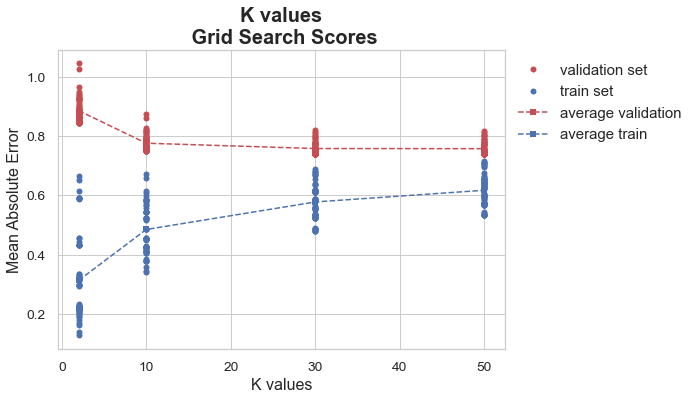

In [467]:
plot_cv_train_test(results_df, "k", "K values")

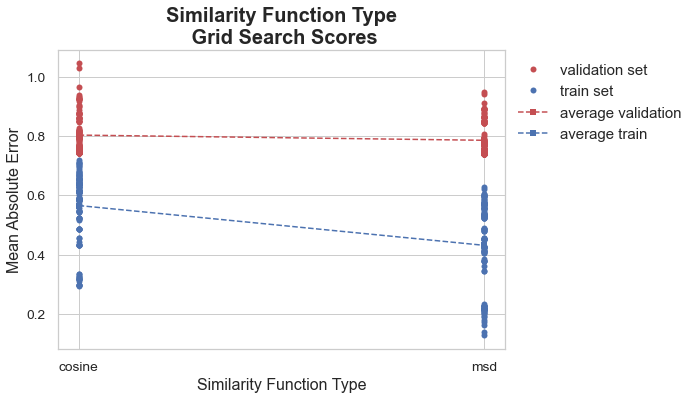

In [468]:
plot_cv_train_test(results_df, "sim_options", "Similarity Function Type", param_property='name', value_type=str)

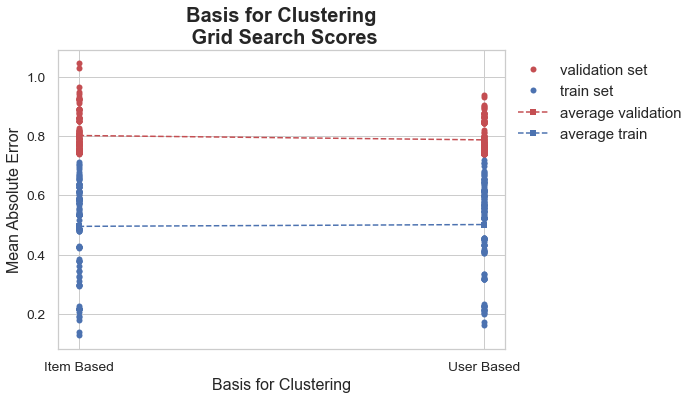

In [469]:
plot_cv_train_test(results_df, "sim_options", "Basis for Clustering", param_property='user_based', xticks = [False, True], xticklabels=['Item Based', 'User Based'])


### Save Results

In [143]:
outdir = 'leaderboard_predictions'
outfile = 'knn_baseline_gridsearch_predicted_ratings_leaderboard.txt'
outpath = os.path.join(outdir, outfile)
with open(outpath, 'w') as f:
    for ind in range(len(leaderboard_test_tuple[0])):
        pred = gs_algo.predict(leaderboard_test_tuple[0][ind], leaderboard_test_tuple[1][ind])
        print(pred)
        f.write(str(pred[3])+'\n')

user: 503        item: 204        r_ui = None   est = 4.16   {'actual_k': 50, 'was_impossible': False}
user: 795        item: 185        r_ui = None   est = 3.86   {'actual_k': 50, 'was_impossible': False}
user: 42         item: 403        r_ui = None   est = 3.56   {'actual_k': 50, 'was_impossible': False}
user: 327        item: 740        r_ui = None   est = 3.46   {'actual_k': 50, 'was_impossible': False}
user: 285        item: 98         r_ui = None   est = 3.94   {'actual_k': 50, 'was_impossible': False}
user: 279        item: 11         r_ui = None   est = 4.62   {'actual_k': 50, 'was_impossible': False}
user: 496        item: 588        r_ui = None   est = 2.11   {'actual_k': 13, 'was_impossible': False}
user: 499        item: 266        r_ui = None   est = 3.69   {'actual_k': 50, 'was_impossible': False}
user: 357        item: 126        r_ui = None   est = 4.40   {'actual_k': 50, 'was_impossible': False}
user: 932        item: 182        r_ui = None   est = 3.29   {'actual_k':

user: 220        item: 155        r_ui = None   est = 4.12   {'actual_k': 50, 'was_impossible': False}
user: 906        item: 1045       r_ui = None   est = 3.84   {'actual_k': 50, 'was_impossible': False}
user: 53         item: 257        r_ui = None   est = 4.24   {'actual_k': 50, 'was_impossible': False}
user: 356        item: 746        r_ui = None   est = 4.35   {'actual_k': 50, 'was_impossible': False}
user: 654        item: 1309       r_ui = None   est = 2.18   {'actual_k': 11, 'was_impossible': False}
user: 822        item: 469        r_ui = None   est = 3.73   {'actual_k': 50, 'was_impossible': False}
user: 842        item: 576        r_ui = None   est = 2.33   {'actual_k': 50, 'was_impossible': False}
user: 61         item: 274        r_ui = None   est = 3.37   {'actual_k': 50, 'was_impossible': False}
user: 616        item: 55         r_ui = None   est = 3.61   {'actual_k': 50, 'was_impossible': False}
user: 0          item: 126        r_ui = None   est = 4.43   {'actual_k':

user: 804        item: 143        r_ui = None   est = 3.62   {'actual_k': 50, 'was_impossible': False}
user: 143        item: 247        r_ui = None   est = 3.72   {'actual_k': 50, 'was_impossible': False}
user: 450        item: 881        r_ui = None   est = 2.57   {'actual_k': 6, 'was_impossible': False}
user: 193        item: 496        r_ui = None   est = 3.68   {'actual_k': 50, 'was_impossible': False}
user: 876        item: 300        r_ui = None   est = 4.48   {'actual_k': 50, 'was_impossible': False}
user: 375        item: 319        r_ui = None   est = 3.10   {'actual_k': 31, 'was_impossible': False}
user: 183        item: 257        r_ui = None   est = 3.80   {'actual_k': 50, 'was_impossible': False}
user: 140        item: 676        r_ui = None   est = 2.79   {'actual_k': 50, 'was_impossible': False}
user: 393        item: 171        r_ui = None   est = 4.55   {'actual_k': 50, 'was_impossible': False}
user: 41         item: 86         r_ui = None   est = 4.42   {'actual_k': 

user: 762        item: 237        r_ui = None   est = 4.08   {'actual_k': 50, 'was_impossible': False}
user: 343        item: 267        r_ui = None   est = 4.19   {'actual_k': 50, 'was_impossible': False}
user: 621        item: 551        r_ui = None   est = 3.06   {'actual_k': 37, 'was_impossible': False}
user: 819        item: 314        r_ui = None   est = 3.86   {'actual_k': 50, 'was_impossible': False}
user: 258        item: 64         r_ui = None   est = 3.72   {'actual_k': 50, 'was_impossible': False}
user: 503        item: 544        r_ui = None   est = 3.06   {'actual_k': 50, 'was_impossible': False}
user: 785        item: 233        r_ui = None   est = 3.99   {'actual_k': 50, 'was_impossible': False}
user: 0          item: 111        r_ui = None   est = 2.66   {'actual_k': 14, 'was_impossible': False}
user: 763        item: 116        r_ui = None   est = 3.91   {'actual_k': 50, 'was_impossible': False}
user: 143        item: 8          r_ui = None   est = 3.87   {'actual_k':

user: 841        item: 270        r_ui = None   est = 4.75   {'actual_k': 23, 'was_impossible': False}
user: 674        item: 648        r_ui = None   est = 3.97   {'actual_k': 20, 'was_impossible': False}
user: 15         item: 88         r_ui = None   est = 4.77   {'actual_k': 50, 'was_impossible': False}
user: 877        item: 921        r_ui = None   est = 3.88   {'actual_k': 40, 'was_impossible': False}
user: 210        item: 301        r_ui = None   est = 3.64   {'actual_k': 24, 'was_impossible': False}
user: 670        item: 595        r_ui = None   est = 3.33   {'actual_k': 50, 'was_impossible': False}
user: 87         item: 879        r_ui = None   est = 2.52   {'actual_k': 8, 'was_impossible': False}
user: 335        item: 403        r_ui = None   est = 2.85   {'actual_k': 50, 'was_impossible': False}
user: 313        item: 245        r_ui = None   est = 4.42   {'actual_k': 50, 'was_impossible': False}
user: 19         item: 185        r_ui = None   est = 3.09   {'actual_k': 

user: 192        item: 126        r_ui = None   est = 4.03   {'actual_k': 50, 'was_impossible': False}
user: 360        item: 96         r_ui = None   est = 3.72   {'actual_k': 50, 'was_impossible': False}
user: 6          item: 573        r_ui = None   est = 2.91   {'actual_k': 31, 'was_impossible': False}
user: 929        item: 1008       r_ui = None   est = 3.07   {'actual_k': 26, 'was_impossible': False}
user: 653        item: 153        r_ui = None   est = 3.78   {'actual_k': 50, 'was_impossible': False}
user: 384        item: 1533       r_ui = None   est = 3.44   {'actual_k': 2, 'was_impossible': False}
user: 151        item: 502        r_ui = None   est = 4.43   {'actual_k': 50, 'was_impossible': False}
user: 527        item: 249        r_ui = None   est = 3.68   {'actual_k': 50, 'was_impossible': False}
user: 172        item: 261        r_ui = None   est = 4.70   {'actual_k': 30, 'was_impossible': False}
user: 705        item: 754        r_ui = None   est = 2.85   {'actual_k': 

user: 192        item: 691        r_ui = None   est = 3.19   {'actual_k': 50, 'was_impossible': False}
user: 882        item: 126        r_ui = None   est = 4.64   {'actual_k': 50, 'was_impossible': False}
user: 791        item: 146        r_ui = None   est = 2.91   {'actual_k': 50, 'was_impossible': False}
user: 727        item: 14         r_ui = None   est = 3.77   {'actual_k': 50, 'was_impossible': False}
user: 72         item: 47         r_ui = None   est = 4.31   {'actual_k': 50, 'was_impossible': False}
user: 804        item: 149        r_ui = None   est = 3.75   {'actual_k': 50, 'was_impossible': False}
user: 82         item: 860        r_ui = None   est = 1.95   {'actual_k': 11, 'was_impossible': False}
user: 924        item: 814        r_ui = None   est = 2.33   {'actual_k': 12, 'was_impossible': False}
user: 621        item: 403        r_ui = None   est = 3.13   {'actual_k': 50, 'was_impossible': False}
user: 398        item: 117        r_ui = None   est = 2.71   {'actual_k':

user: 373        item: 97         r_ui = None   est = 4.17   {'actual_k': 50, 'was_impossible': False}
user: 307        item: 846        r_ui = None   est = 3.52   {'actual_k': 6, 'was_impossible': False}
user: 804        item: 271        r_ui = None   est = 3.29   {'actual_k': 50, 'was_impossible': False}
user: 225        item: 179        r_ui = None   est = 4.21   {'actual_k': 50, 'was_impossible': False}
user: 292        item: 286        r_ui = None   est = 2.88   {'actual_k': 50, 'was_impossible': False}
user: 885        item: 231        r_ui = None   est = 3.25   {'actual_k': 50, 'was_impossible': False}
user: 214        item: 22         r_ui = None   est = 4.07   {'actual_k': 50, 'was_impossible': False}
user: 565        item: 393        r_ui = None   est = 2.31   {'actual_k': 40, 'was_impossible': False}
user: 330        item: 46         r_ui = None   est = 3.35   {'actual_k': 50, 'was_impossible': False}
user: 84         item: 227        r_ui = None   est = 3.49   {'actual_k': 

user: 471        item: 1033       r_ui = None   est = 3.99   {'actual_k': 46, 'was_impossible': False}
user: 148        item: 261        r_ui = None   est = 3.59   {'actual_k': 32, 'was_impossible': False}
user: 706        item: 690        r_ui = None   est = 3.19   {'actual_k': 50, 'was_impossible': False}
user: 105        item: 737        r_ui = None   est = 3.35   {'actual_k': 50, 'was_impossible': False}
user: 487        item: 603        r_ui = None   est = 3.07   {'actual_k': 21, 'was_impossible': False}
user: 715        item: 834        r_ui = None   est = 3.96   {'actual_k': 18, 'was_impossible': False}
user: 629        item: 70         r_ui = None   est = 3.73   {'actual_k': 50, 'was_impossible': False}
user: 860        item: 287        r_ui = None   est = 3.26   {'actual_k': 44, 'was_impossible': False}
user: 373        item: 202        r_ui = None   est = 3.73   {'actual_k': 50, 'was_impossible': False}
user: 395        item: 116        r_ui = None   est = 4.13   {'actual_k':

user: 231        item: 649        r_ui = None   est = 4.03   {'actual_k': 50, 'was_impossible': False}
user: 118        item: 980        r_ui = None   est = 3.07   {'actual_k': 14, 'was_impossible': False}
user: 732        item: 249        r_ui = None   est = 3.15   {'actual_k': 50, 'was_impossible': False}
user: 494        item: 10         r_ui = None   est = 4.18   {'actual_k': 50, 'was_impossible': False}
user: 324        item: 142        r_ui = None   est = 3.24   {'actual_k': 50, 'was_impossible': False}
user: 880        item: 476        r_ui = None   est = 3.88   {'actual_k': 50, 'was_impossible': False}
user: 140        item: 119        r_ui = None   est = 2.23   {'actual_k': 45, 'was_impossible': False}
user: 200        item: 1172       r_ui = None   est = 2.78   {'actual_k': 5, 'was_impossible': False}
user: 260        item: 292        r_ui = None   est = 4.12   {'actual_k': 43, 'was_impossible': False}
user: 449        item: 270        r_ui = None   est = 4.58   {'actual_k': 

user: 654        item: 733        r_ui = None   est = 3.16   {'actual_k': 50, 'was_impossible': False}
user: 924        item: 321        r_ui = None   est = 2.94   {'actual_k': 42, 'was_impossible': False}
user: 485        item: 107        r_ui = None   est = 3.10   {'actual_k': 47, 'was_impossible': False}
user: 706        item: 369        r_ui = None   est = 3.21   {'actual_k': 41, 'was_impossible': False}
user: 585        item: 76         r_ui = None   est = 3.36   {'actual_k': 50, 'was_impossible': False}
user: 202        item: 249        r_ui = None   est = 3.51   {'actual_k': 50, 'was_impossible': False}
user: 86         item: 295        r_ui = None   est = 4.34   {'actual_k': 25, 'was_impossible': False}
user: 582        item: 511        r_ui = None   est = 4.93   {'actual_k': 29, 'was_impossible': False}
user: 174        item: 194        r_ui = None   est = 3.60   {'actual_k': 50, 'was_impossible': False}
user: 479        item: 182        r_ui = None   est = 3.98   {'actual_k':

user: 874        item: 182        r_ui = None   est = 4.41   {'actual_k': 50, 'was_impossible': False}
user: 623        item: 344        r_ui = None   est = 3.67   {'actual_k': 50, 'was_impossible': False}
user: 404        item: 140        r_ui = None   est = 2.00   {'actual_k': 39, 'was_impossible': False}
user: 673        item: 292        r_ui = None   est = 3.44   {'actual_k': 50, 'was_impossible': False}
user: 267        item: 581        r_ui = None   est = 2.69   {'actual_k': 24, 'was_impossible': False}
user: 728        item: 270        r_ui = None   est = 4.26   {'actual_k': 23, 'was_impossible': False}
user: 338        item: 940        r_ui = None   est = 3.95   {'actual_k': 30, 'was_impossible': False}
user: 636        item: 406        r_ui = None   est = 3.61   {'actual_k': 50, 'was_impossible': False}
user: 188        item: 202        r_ui = None   est = 4.23   {'actual_k': 50, 'was_impossible': False}
user: 457        item: 181        r_ui = None   est = 3.83   {'actual_k':

user: 327        item: 355        r_ui = None   est = 4.43   {'actual_k': 50, 'was_impossible': False}
user: 794        item: 766        r_ui = None   est = 2.91   {'actual_k': 33, 'was_impossible': False}
user: 325        item: 644        r_ui = None   est = 3.68   {'actual_k': 24, 'was_impossible': False}
user: 10         item: 221        r_ui = None   est = 3.49   {'actual_k': 50, 'was_impossible': False}
user: 253        item: 391        r_ui = None   est = 3.20   {'actual_k': 50, 'was_impossible': False}
user: 388        item: 778        r_ui = None   est = 2.99   {'actual_k': 44, 'was_impossible': False}
user: 534        item: 63         r_ui = None   est = 4.49   {'actual_k': 50, 'was_impossible': False}
user: 221        item: 171        r_ui = None   est = 4.07   {'actual_k': 50, 'was_impossible': False}
user: 111        item: 901        r_ui = None   est = 3.46   {'actual_k': 9, 'was_impossible': False}
user: 523        item: 185        r_ui = None   est = 3.64   {'actual_k': 

user: 464        item: 298        r_ui = None   est = 3.06   {'actual_k': 50, 'was_impossible': False}
user: 539        item: 24         r_ui = None   est = 3.54   {'actual_k': 50, 'was_impossible': False}
user: 10         item: 7          r_ui = None   est = 3.93   {'actual_k': 50, 'was_impossible': False}
user: 408        item: 283        r_ui = None   est = 4.32   {'actual_k': 50, 'was_impossible': False}
user: 488        item: 297        r_ui = None   est = 3.36   {'actual_k': 47, 'was_impossible': False}
user: 345        item: 1186       r_ui = None   est = 2.94   {'actual_k': 25, 'was_impossible': False}
user: 592        item: 653        r_ui = None   est = 4.10   {'actual_k': 50, 'was_impossible': False}
user: 754        item: 321        r_ui = None   est = 2.83   {'actual_k': 50, 'was_impossible': False}
user: 457        item: 431        r_ui = None   est = 3.61   {'actual_k': 50, 'was_impossible': False}
user: 416        item: 215        r_ui = None   est = 3.82   {'actual_k':

user: 696        item: 122        r_ui = None   est = 3.69   {'actual_k': 50, 'was_impossible': False}
user: 884        item: 0          r_ui = None   est = 3.79   {'actual_k': 50, 'was_impossible': False}
user: 6          item: 588        r_ui = None   est = 2.68   {'actual_k': 13, 'was_impossible': False}
user: 249        item: 122        r_ui = None   est = 3.50   {'actual_k': 50, 'was_impossible': False}
user: 187        item: 633        r_ui = None   est = 3.08   {'actual_k': 9, 'was_impossible': False}
user: 889        item: 0          r_ui = None   est = 4.20   {'actual_k': 50, 'was_impossible': False}
user: 63         item: 682        r_ui = None   est = 3.66   {'actual_k': 50, 'was_impossible': False}
user: 58         item: 160        r_ui = None   est = 3.66   {'actual_k': 50, 'was_impossible': False}
user: 464        item: 113        r_ui = None   est = 4.10   {'actual_k': 33, 'was_impossible': False}
user: 41         item: 449        r_ui = None   est = 3.78   {'actual_k': 

user: 342        item: 275        r_ui = None   est = 3.80   {'actual_k': 50, 'was_impossible': False}
user: 693        item: 1267       r_ui = None   est = 4.21   {'actual_k': 7, 'was_impossible': False}
user: 346        item: 191        r_ui = None   est = 4.20   {'actual_k': 50, 'was_impossible': False}
user: 221        item: 691        r_ui = None   est = 3.37   {'actual_k': 50, 'was_impossible': False}
user: 600        item: 926        r_ui = None   est = 2.57   {'actual_k': 50, 'was_impossible': False}
user: 595        item: 311        r_ui = None   est = 4.54   {'actual_k': 50, 'was_impossible': False}
user: 150        item: 501        r_ui = None   est = 3.90   {'actual_k': 25, 'was_impossible': False}
user: 485        item: 683        r_ui = None   est = 3.01   {'actual_k': 50, 'was_impossible': False}
user: 81         item: 284        r_ui = None   est = 3.26   {'actual_k': 50, 'was_impossible': False}
user: 827        item: 1194       r_ui = None   est = 3.08   {'actual_k': 

user: 537        item: 287        r_ui = None   est = 3.03   {'actual_k': 50, 'was_impossible': False}
user: 832        item: 465        r_ui = None   est = 3.53   {'actual_k': 30, 'was_impossible': False}
user: 661        item: 1340       r_ui = None   est = 2.68   {'actual_k': 1, 'was_impossible': False}
user: 292        item: 216        r_ui = None   est = 2.74   {'actual_k': 50, 'was_impossible': False}
user: 180        item: 266        r_ui = None   est = 2.15   {'actual_k': 50, 'was_impossible': False}
user: 302        item: 332        r_ui = None   est = 3.07   {'actual_k': 34, 'was_impossible': False}
user: 475        item: 957        r_ui = None   est = 3.64   {'actual_k': 39, 'was_impossible': False}
user: 550        item: 542        r_ui = None   est = 3.66   {'actual_k': 49, 'was_impossible': False}
user: 870        item: 1386       r_ui = None   est = 3.10   {'actual_k': 2, 'was_impossible': False}
user: 301        item: 356        r_ui = None   est = 2.33   {'actual_k': 2

user: 726        item: 272        r_ui = None   est = 3.25   {'actual_k': 50, 'was_impossible': False}
user: 285        item: 214        r_ui = None   est = 3.81   {'actual_k': 50, 'was_impossible': False}
user: 214        item: 87         r_ui = None   est = 3.53   {'actual_k': 50, 'was_impossible': False}
user: 536        item: 956        r_ui = None   est = 3.54   {'actual_k': 12, 'was_impossible': False}
user: 618        item: 877        r_ui = None   est = 3.23   {'actual_k': 50, 'was_impossible': False}
user: 845        item: 646        r_ui = None   est = 4.25   {'actual_k': 48, 'was_impossible': False}
user: 36         item: 229        r_ui = None   est = 3.78   {'actual_k': 50, 'was_impossible': False}
user: 536        item: 973        r_ui = None   est = 2.33   {'actual_k': 30, 'was_impossible': False}
user: 692        item: 497        r_ui = None   est = 3.29   {'actual_k': 44, 'was_impossible': False}
user: 941        item: 1219       r_ui = None   est = 3.87   {'actual_k':

user: 933        item: 120        r_ui = None   est = 3.52   {'actual_k': 50, 'was_impossible': False}
user: 528        item: 317        r_ui = None   est = 3.54   {'actual_k': 50, 'was_impossible': False}
user: 221        item: 101        r_ui = None   est = 2.90   {'actual_k': 42, 'was_impossible': False}
user: 594        item: 287        r_ui = None   est = 3.09   {'actual_k': 50, 'was_impossible': False}
user: 4          item: 419        r_ui = None   est = 3.11   {'actual_k': 50, 'was_impossible': False}
user: 942        item: 794        r_ui = None   est = 3.19   {'actual_k': 23, 'was_impossible': False}
user: 839        item: 504        r_ui = None   est = 4.32   {'actual_k': 50, 'was_impossible': False}
user: 641        item: 1177       r_ui = None   est = 3.51   {'actual_k': 3, 'was_impossible': False}
user: 654        item: 136        r_ui = None   est = 3.45   {'actual_k': 50, 'was_impossible': False}
user: 0          item: 210        r_ui = None   est = 4.09   {'actual_k': 

user: 98         item: 239        r_ui = None   est = 2.98   {'actual_k': 50, 'was_impossible': False}
user: 710        item: 739        r_ui = None   est = 3.86   {'actual_k': 35, 'was_impossible': False}
user: 55         item: 321        r_ui = None   est = 3.26   {'actual_k': 50, 'was_impossible': False}
user: 196        item: 229        r_ui = None   est = 3.54   {'actual_k': 50, 'was_impossible': False}
user: 425        item: 488        r_ui = None   est = 3.99   {'actual_k': 32, 'was_impossible': False}
user: 244        item: 892        r_ui = None   est = 1.37   {'actual_k': 2, 'was_impossible': False}
user: 238        item: 286        r_ui = None   est = 3.72   {'actual_k': 50, 'was_impossible': False}
user: 342        item: 272        r_ui = None   est = 3.72   {'actual_k': 50, 'was_impossible': False}
user: 164        item: 286        r_ui = None   est = 3.72   {'actual_k': 50, 'was_impossible': False}
user: 377        item: 959        r_ui = None   est = 3.89   {'actual_k': 

user: 934        item: 236        r_ui = None   est = 4.26   {'actual_k': 50, 'was_impossible': False}
user: 827        item: 749        r_ui = None   est = 3.00   {'actual_k': 50, 'was_impossible': False}
user: 532        item: 355        r_ui = None   est = 4.12   {'actual_k': 50, 'was_impossible': False}
user: 412        item: 298        r_ui = None   est = 3.67   {'actual_k': 50, 'was_impossible': False}
user: 618        item: 348        r_ui = None   est = 3.27   {'actual_k': 19, 'was_impossible': False}
user: 726        item: 607        r_ui = None   est = 3.29   {'actual_k': 44, 'was_impossible': False}
user: 886        item: 242        r_ui = None   est = 2.94   {'actual_k': 50, 'was_impossible': False}
user: 118        item: 314        r_ui = None   est = 4.57   {'actual_k': 50, 'was_impossible': False}
user: 467        item: 281        r_ui = None   est = 4.03   {'actual_k': 50, 'was_impossible': False}
user: 43         item: 199        r_ui = None   est = 3.91   {'actual_k':

user: 373        item: 69         r_ui = None   est = 3.68   {'actual_k': 50, 'was_impossible': False}
user: 605        item: 23         r_ui = None   est = 3.72   {'actual_k': 50, 'was_impossible': False}
user: 278        item: 500        r_ui = None   est = 3.55   {'actual_k': 31, 'was_impossible': False}
user: 270        item: 493        r_ui = None   est = 3.54   {'actual_k': 38, 'was_impossible': False}
user: 491        item: 126        r_ui = None   est = 4.10   {'actual_k': 50, 'was_impossible': False}
user: 292        item: 282        r_ui = None   est = 2.94   {'actual_k': 50, 'was_impossible': False}
user: 795        item: 186        r_ui = None   est = 4.26   {'actual_k': 50, 'was_impossible': False}
user: 203        item: 295        r_ui = None   est = 3.75   {'actual_k': 26, 'was_impossible': False}
user: 808        item: 297        r_ui = None   est = 2.58   {'actual_k': 23, 'was_impossible': False}
user: 921        item: 256        r_ui = None   est = 3.82   {'actual_k':

user: 564        item: 212        r_ui = None   est = 4.88   {'actual_k': 50, 'was_impossible': False}
user: 398        item: 494        r_ui = None   est = 3.63   {'actual_k': 50, 'was_impossible': False}
user: 320        item: 152        r_ui = None   est = 3.63   {'actual_k': 50, 'was_impossible': False}
user: 688        item: 469        r_ui = None   est = 3.72   {'actual_k': 50, 'was_impossible': False}
user: 542        item: 768        r_ui = None   est = 3.27   {'actual_k': 39, 'was_impossible': False}
user: 62         item: 406        r_ui = None   est = 4.14   {'actual_k': 50, 'was_impossible': False}
user: 781        item: 874        r_ui = None   est = 2.19   {'actual_k': 30, 'was_impossible': False}
user: 434        item: 670        r_ui = None   est = 2.73   {'actual_k': 45, 'was_impossible': False}
user: 226        item: 284        r_ui = None   est = 3.94   {'actual_k': 50, 'was_impossible': False}
user: 392        item: 227        r_ui = None   est = 3.85   {'actual_k':

user: 197        item: 69         r_ui = None   est = 3.49   {'actual_k': 50, 'was_impossible': False}
user: 842        item: 625        r_ui = None   est = 2.47   {'actual_k': 50, 'was_impossible': False}
user: 48         item: 944        r_ui = None   est = 2.50   {'actual_k': 40, 'was_impossible': False}
user: 419        item: 601        r_ui = None   est = 4.77   {'actual_k': 50, 'was_impossible': False}
user: 874        item: 130        r_ui = None   est = 4.14   {'actual_k': 50, 'was_impossible': False}
user: 898        item: 256        r_ui = None   est = 3.72   {'actual_k': 50, 'was_impossible': False}
user: 222        item: 319        r_ui = None   est = 2.94   {'actual_k': 50, 'was_impossible': False}
user: 424        item: 1594       r_ui = None   est = 3.02   {'was_impossible': False}
user: 74         item: 302        r_ui = None   est = 3.58   {'actual_k': 50, 'was_impossible': False}
user: 386        item: 210        r_ui = None   est = 3.91   {'actual_k': 50, 'was_imposs

user: 327        item: 186        r_ui = None   est = 4.22   {'actual_k': 50, 'was_impossible': False}
user: 12         item: 838        r_ui = None   est = 2.53   {'actual_k': 39, 'was_impossible': False}
user: 843        item: 183        r_ui = None   est = 3.49   {'actual_k': 50, 'was_impossible': False}
user: 6          item: 332        r_ui = None   est = 3.69   {'actual_k': 22, 'was_impossible': False}
user: 80         item: 542        r_ui = None   est = 3.05   {'actual_k': 47, 'was_impossible': False}
user: 76         item: 521        r_ui = None   est = 3.82   {'actual_k': 50, 'was_impossible': False}
user: 404        item: 1259       r_ui = None   est = 2.40   {'actual_k': 2, 'was_impossible': False}
user: 59         item: 496        r_ui = None   est = 4.39   {'actual_k': 50, 'was_impossible': False}
user: 634        item: 0          r_ui = None   est = 3.58   {'actual_k': 50, 'was_impossible': False}
user: 174        item: 70         r_ui = None   est = 3.37   {'actual_k': 